## Inspect Unseen single-cell dataset - Gondal et al 2025

In [1]:
import anndata as ad
import os
import scanpy as sc
import pandas as pd

In [2]:
gondal_et_al_2025 = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025.h5ad")
gondal_et_al_2025.obs

,PMID_donor_id,donor_id,pre_post,author_cell_type,author_cell_type_update,outcome,Combined_outcome,Cancer_type_update,Study_name,Primary_or_met,...,Cell_type_broad,is_primary_data,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
M21_3p2_Lym_A01_S1,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,MBM,Alvarez_Breckenridge,Metastatic,...,Other,True,T cell,Smart-seq2,metastatic melanoma,male,brain,unknown,postnatal stage,=~lWXS_pj@
M21_3p2_Lym_A02_S2,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,MBM,Alvarez_Breckenridge,Metastatic,...,Other,True,T cell,Smart-seq2,metastatic melanoma,male,brain,unknown,postnatal stage,oAbeDZ2Hz{
M21_3p2_Lym_A03_S3,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,MBM,Alvarez_Breckenridge,Metastatic,...,Other,True,T cell,Smart-seq2,metastatic melanoma,male,brain,unknown,postnatal stage,Eq)5a2vT^I
M21_3p2_Lym_A04_S4,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,MBM,Alvarez_Breckenridge,Metastatic,...,Other,True,T cell,Smart-seq2,metastatic melanoma,male,brain,unknown,postnatal stage,p7MqH^XMcX
M21_3p2_Lym_A05_S5,35706413gggMEL021,MEL021,Post,T Cell,T_cell,PR,Favourable,MBM,Alvarez_Breckenridge,Metastatic,...,Other,True,T cell,Smart-seq2,metastatic melanoma,male,brain,unknown,postnatal stage,@QHyhIcD7i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,BCC,Yost,Metastatic,...,Malignant,True,malignant cell,10x 5' transcription profiling,basal cell carcinoma,unknown,arm skin,unknown,postnatal stage,tEZdmy_fhP
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,BCC,Yost,Metastatic,...,Malignant,True,malignant cell,10x 5' transcription profiling,basal cell carcinoma,unknown,arm skin,unknown,postnatal stage,Xh4gF(0%>O
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,BCC,Yost,Metastatic,...,Malignant,True,malignant cell,10x 5' transcription profiling,basal cell carcinoma,unknown,arm skin,unknown,postnatal stage,-s@oa2Bd9*
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT,31359002gggsu008,su008,Post,NA,Malignant,No,Unfavourable,BCC,Yost,Metastatic,...,Malignant,True,malignant cell,10x 5' transcription profiling,basal cell carcinoma,unknown,arm skin,unknown,postnatal stage,aF~6c0hvIe


In [3]:
gondal_et_al_2025_normalized = gondal_et_al_2025.copy()
gondal_et_al_2025_normalized.layers['counts'] = gondal_et_al_2025_normalized.X.copy()
gondal_et_al_2025_normalized.raw = gondal_et_al_2025_normalized
sc.pp.normalize_total(gondal_et_al_2025_normalized, target_sum=1e4) # Normalize to 10,000 counts per cell
sc.pp.log1p(gondal_et_al_2025_normalized) # Log-transform the data

In [4]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
gondal_et_al_2025_normalized.var["mt"] = gondal_et_al_2025_normalized.var_names.str.startswith("MT-")
# ribosomal genes
gondal_et_al_2025_normalized.var["ribo"] = gondal_et_al_2025_normalized.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
gondal_et_al_2025_normalized.var["hb"] = gondal_et_al_2025_normalized.var_names.str.contains("^HB[^(P)]")

In [5]:
sc.pp.calculate_qc_metrics(gondal_et_al_2025_normalized, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)


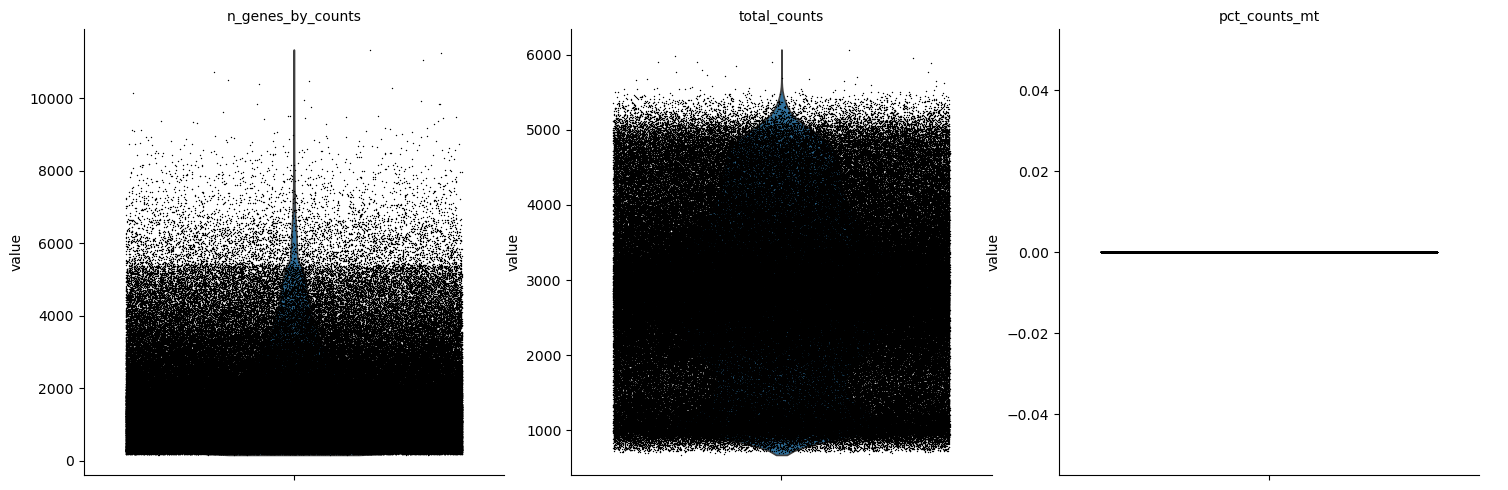

In [6]:
sc.pl.violin(
    gondal_et_al_2025_normalized,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [7]:
sc.pp.filter_cells(gondal_et_al_2025_normalized, min_genes=100)
sc.pp.filter_genes(gondal_et_al_2025_normalized, min_cells=3)

In [8]:
gondal_et_al_2025_normalized.obs["donor_id_pre_post"]

M21_3p2_Lym_A01_S1                                             MEL021_Post
M21_3p2_Lym_A02_S2                                             MEL021_Post
M21_3p2_Lym_A03_S3                                             MEL021_Post
M21_3p2_Lym_A04_S4                                             MEL021_Post
M21_3p2_Lym_A05_S5                                             MEL021_Post
                                                                  ...     
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TTCTTAGGTCTCACCT     su008_Post
Name: donor_id_pre_post, Length: 355941, dtype: category
Categories (223, object): ['BIOKEY_1_Post', 'BIOKEY_1_Pre', 'BIOKEY_2_Post', 'BIOKEY_2_Pre', ..., 'su013_Post', 'su013

In [9]:
import scanpy.external as scr
scr.pp.scrublet(gondal_et_al_2025_normalized, batch_key="donor_id_pre_post",n_prin_comps = 15)

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 19.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 9.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 27.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 36.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 31.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 22.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 43.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 42.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 30.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 26.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 17.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 23.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 54.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 51.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 52.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 41.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 44.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 68.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 59.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 54.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 19.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 29.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 57.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 19.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 48.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 17.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 23.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 44.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 22.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 56.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 51.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 23.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.8%
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 22.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 21.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 56.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 47.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 45.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 39.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 32.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 24.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 24.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 23.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 14.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 14.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 32.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 32.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 44.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 21.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 19.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 60.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%
Automatically set threshold at doublet score = 0.22

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 37.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 52.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 14.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 38.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 22.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 31.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 39.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 40.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 59.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%
Automatically set threshold at doublet score = 0.24

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 53.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 32.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 28.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 29.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 44.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 18.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 25.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 52.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 31.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 33.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 30.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 34.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 61.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 27.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 50.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 46.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 50.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.8%
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 32.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 41.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 21.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 38.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 44.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 24.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.2%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 7.7%
Estimated detectable doublet fraction = 14.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 53.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 6.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 18.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 30.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 6.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.14
Detected doublet rate = 12.9%
Estimated detectable doublet fraction = 28.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 44.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 17.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 27.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%
Automatically set threshold at doublet score = 0.10
Detected doublet rate = 21.4%
Estimated detectable doublet fraction = 14.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 144.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 55.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 37.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 11.1%
Automatically set threshold at doublet score = 0.09
Detected doublet rate = 28.0%
Estimated detectable doublet fraction = 19.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 147.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` o

Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 33.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 37.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.13
Detected doublet rate = 5.6%
Estimated detectable doublet fraction = 36.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 15.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 53.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 18.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 43.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 43.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 48.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%
Automatically set threshold at doublet score = 0.12
Detected doublet rate = 15.2%
Estimated detectable doublet fraction = 15.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 96.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 42.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 37.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 47.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 48.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 6.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 60.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 43.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 45.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 27.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 43.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 24.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 41.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 35.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 6.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 55.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 35.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 114.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 12.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 13.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 44.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 9.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 42.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 48.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 49.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 55.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 39.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.06
Detected doublet rate = 48.3%
Estimated detectable doublet fraction = 25.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 186.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 33.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 2.3%
Estimated detectable doublet fraction = 29.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 4.0%
Estimated detectable doublet fraction = 26.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 15.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 35.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 6.8%
Estimated detectable doublet fraction = 19.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 34.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.06
Detected doublet rate = 61.3%
Estimated detectable doublet fraction = 41.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 146.2%
Automatically set threshold at doublet score = 0.06
Detected doublet rate = 76.2%
Estimated detectable doublet fraction = 38.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 200.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy

Automatically set threshold at doublet score = 0.08
Detected doublet rate = 26.1%
Estimated detectable doublet fraction = 38.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 68.6%
Automatically set threshold at doublet score = 0.09
Detected doublet rate = 22.2%
Estimated detectable doublet fraction = 11.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 200.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.09
Detected doublet rate = 15.2%
Estimated detectable doublet fraction = 23.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 63.6%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 5.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 66.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.11
Detected doublet rate = 9.8%
Estimated detectable doublet fraction = 27.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 36.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 11.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
Automatically set threshold at doublet score = 0.12

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number



Detected doublet rate = 19.4%
Estimated detectable doublet fraction = 23.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 82.8%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 5.1%
Estimated detectable doublet fraction = 3.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 150.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.14
Detected doublet rate = 2.5%
Estimated detectable doublet fraction = 20.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 12.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.08
Detected doublet rate = 26.2%
Estimated detectable doublet fraction = 22.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 118.5%
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 17.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 9.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.08
Detected doublet rate = 37.3%
Estimated detectable doublet fraction = 20.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 183.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 2.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 100.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.14
Detected doublet rate = 6.5%
Estimated detectable doublet fraction = 12.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 51.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 42.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 39.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.3%
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 3.5%
Estimated detectable doublet fraction = 7.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 45.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.11
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 19.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 10.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 43.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 49.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 5.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 32.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 11.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 21.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 39.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 54.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.4%
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 5.8%
Estimated detectable doublet fraction = 15.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 36.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 49.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 42.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 40.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.11
Detected doublet rate = 15.2%
Estimated detectable doublet fraction = 30.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 50.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 5.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 11.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 7.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 22.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 5.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 13.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 16.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 5.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 4.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.5%
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 5.6%
Estimated detectable doublet fraction = 14.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 40.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 13.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.06
Detected doublet rate = 59.5%
Estimated detectable doublet fraction = 46.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 128.2%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 3.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 28.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 3.4%
Estimated detectable doublet fraction = 19.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 16.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.11
Detected doublet rate = 17.7%
Estimated detectable doublet fraction = 22.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 80.0%
Automatically set threshold at doublet score = 0.12
Detected doublet rate = 30.7%
Estimated detectable doublet fraction = 12.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 242.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 4.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 18.2%
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 15.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 13.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.09
Detected doublet rate = 25.8%
Estimated detectable doublet fraction = 22.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 114.3%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 4.3%
Estimated detectable doublet fraction = 15.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 28.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 7.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 42.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 10.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 17.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.0%
Automatically set threshold at doublet score = 0.21
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 11.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 21.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 11.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 13.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.7%
Automatically set threshold at doublet score = 0.06
Detected doublet rate = 46.7%
Estimated detectable doublet fraction = 38.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 121.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.12
Detected doublet rate = 4.3%
Estimated detectable doublet fraction = 15.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 27.3%
Automatically set threshold at doublet score = 0.06
Detected doublet rate = 72.0%
Estimated detectable doublet fraction = 62.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 116.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


Automatically set threshold at doublet score = 0.05
Detected doublet rate = 62.1%
Estimated detectable doublet fraction = 46.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 133.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 47.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 21.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 4.8%
Estimated detectable doublet fraction = 10.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 45.2%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 5.7%
Estimated detectable doublet fraction = 32.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 17.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 32.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 51.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 58.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 15.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 52.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 58.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 56.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 60.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 7.5%
Estimated detectable doublet fraction = 4.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 173.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 32.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 27.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 52.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 24.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 20.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 3.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 7.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 24.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 23.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 13.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 9.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 27.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%
Automatically set threshold at doublet score = 0.06
Detected doublet rate = 83.3%
Estimated detectable doublet fraction = 45.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 181.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 13.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


In [11]:
gondal_et_al_2025_normalized_qc = gondal_et_al_2025_normalized[gondal_et_al_2025_normalized.obs['predicted_doublet'] == False]


In [13]:
print(gondal_et_al_2025_normalized.shape)
print(gondal_et_al_2025_normalized_qc.shape)

(355941, 22547)
(353712, 22547)


In [14]:
del gondal_et_al_2025_normalized
del gondal_et_al_2025

In [15]:
import gc
gc.collect()

19735

In [ ]:

gondal_et_al_2025_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_et_al_2025_normalized_qc.h5ad")


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initiali

: 

In [ ]:
sc.tl.pca(gondal_et_al_2025_normalized_qc)
sc.pp.neighbors(gondal_et_al_2025_normalized_qc)
sc.tl.umap(gondal_et_al_2025_normalized_qc)


In [ ]:
gondal_et_al_2025_normalized_qc = gondal_et_al_2025_normalized[gondal_et_al_2025_normalized.obs['predicted_doublet'] == False]
print(gondal_et_al_2025_normalized_qc.shape)
print(gondal_et_al_2025_normalized.shape)
#luoma_et_al_all_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized_qc.h5ad")


## Inspect meta-data of Gondal et al., 2025
We first examine the number of cells/features for responders and non-responders in this dataset, specifically removing Jerby-Annon and Ma data which is used in Tres. 

In [3]:
print(set(gondal_et_al_2025.obs["Study_name"]))

{'Tirosh', 'Pozniak', 'Bi', 'Bassez', 'Jerby_Arnon', 'Yost', 'Ma', 'Alvarez_Breckenridge'}


In [4]:
# inspect the following - 1. how many cells, how many cells after exclude jerby-annon (Tres[train])); 
#2. how many samples, how many samples after exclude jerby annon
print(gondal_et_al_2025.obs.shape)

print(len(set(gondal_et_al_2025.obs["donor_id"])))
# Exclude cells from Jerby_Arnon and Ma, then count unique donor_id
mask = (gondal_et_al_2025.obs["Study_name"] != "Jerby_Arnon") & (gondal_et_al_2025.obs["Study_name"] != "Ma")
print(len(set(gondal_et_al_2025.obs.loc[mask, "donor_id"])))  # 133 samples
gondal_et_al_2025_not_jerby = gondal_et_al_2025[mask].copy()
gondal_et_al_2025_not_jerby

(355941, 40)
167
133


AnnData object with n_obs × n_vars = 345747 × 22781
    obs: 'PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type', 'author_cell_type_update', 'outcome', 'Combined_outcome', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance.standardized', 'v

In [5]:
set(gondal_et_al_2025_not_jerby.obs["Study_name"])

{'Alvarez_Breckenridge', 'Bassez', 'Bi', 'Pozniak', 'Tirosh', 'Yost'}

In [6]:
set(gondal_et_al_2025_not_jerby.obs["pre_post"])

{'Post', 'Pre'}

In [7]:
set(gondal_et_al_2025_not_jerby.obs["Combined_outcome"])

{'Favourable', 'UT', 'Unfavourable', 'n/a'}

In [8]:
# Examine how many cells & samples for only responders/non-responders; exclude UT and n/a
print(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["Combined_outcome"].isin(['Favourable','Unfavourable'])].shape) # 311006
print(len(set(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["Combined_outcome"].isin(['Favourable','Unfavourable'])]
              ["donor_id"]))) # 114 samples
gondal_et_al_2025_not_jerby = gondal_et_al_2025_not_jerby[gondal_et_al_2025_not_jerby.obs["Combined_outcome"].isin(['Favourable','Unfavourable'])]

(311006, 40)
114


In [9]:
# inspect how many pre and post per R/NR
print(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["pre_post"]=="Pre"].shape) # 129638
print(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["pre_post"]=="Post"].shape) # 181368

print(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["Combined_outcome"] == "Favourable"].shape) # 137678
print(gondal_et_al_2025_not_jerby.obs[gondal_et_al_2025_not_jerby.obs["Combined_outcome"] == "Unfavourable"].shape) # 173328


(129638, 40)
(181368, 40)
(137678, 40)
(173328, 40)


<Axes: xlabel='pre_post', ylabel='count'>

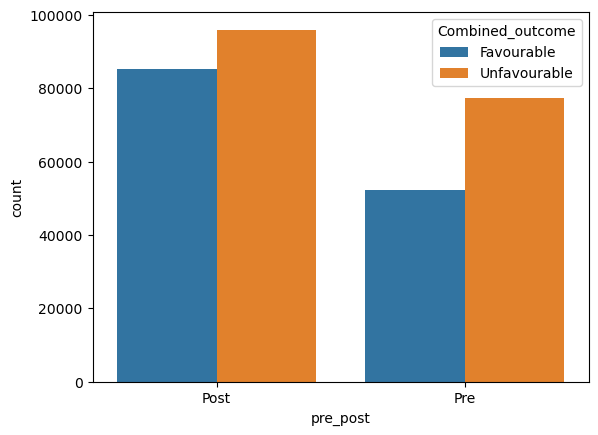

In [10]:
# what about R/NR/pre/post matrix?
import seaborn as sns
import matplotlib.pyplot as plt

# Stage v / s Attack point plot 
sns.countplot(x ='pre_post', hue ='Combined_outcome', data = gondal_et_al_2025_not_jerby.obs)


## Inspect features in Gondal et al., 2025
Next, we examined the features integration method utilised in Gondal's paper. Gondal's paper merged scRNA-seq datasets by using the merge function in Seurat, which create a union feature matrix and assigning gene expression to 0 when the gene is not present in a specific dataset.  

In [11]:
# next question: how many features?
gondal_et_al_2025_not_jerby.X.shape # 22781 features

(311006, 22781)

In [12]:
print(gondal_et_al_2025_not_jerby.var_names) # we may need to transform the ensembl IDs to gene names, when doing the discovery step

Index(['ENSG00000139826', 'ENSG00000158201', 'ENSG00000281376',
       'ENSG00000167972', 'ENSG00000256661', 'ENSG00000125257',
       'ENSG00000256904', 'ENSG00000179869', 'ENSG00000131043',
       'ENSG00000166535',
       ...
       'ENSG00000203897', 'ENSG00000232212', 'ENSG00000230402',
       'ENSG00000233985', 'ENSG00000231364', 'ENSG00000236719',
       'ENSG00000235054', 'ENSG00000233431', 'ENSG00000227177',
       'ENSG00000234601'],
      dtype='object', name='ensembl_id', length=22781)


## Inspect features in Gondal et al., 2025
Next, we examined the cell types utilised in the model

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


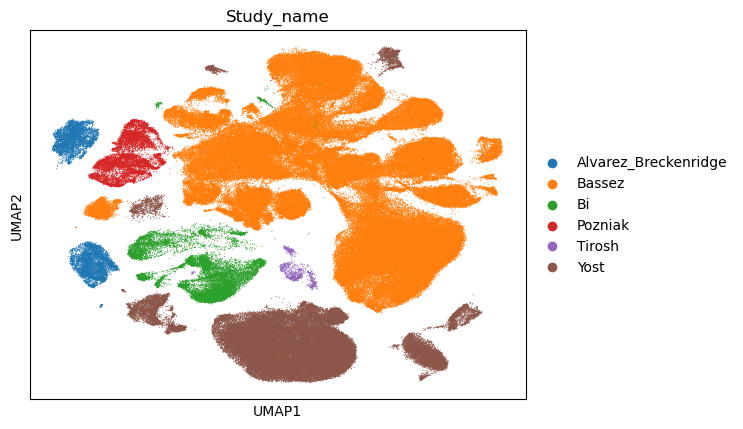

In [15]:
sc.pl.umap(
    gondal_et_al_2025_not_jerby,
    color="Study_name",
    # Setting a smaller point size to get prevent overlap
    size=2
)

pre_post            Study_name  R_Post_cells  R_Pre_cells  R_Post_samples  \
0         Alvarez_Breckenridge          5357          432              11   
1                       Bassez         46930        38337              12   
2                           Bi         10814            0               2   
3                      Pozniak           258         1860               2   
4                       Tirosh             0            0               0   
5                         Yost         22028        11662               7   

pre_post  R_Pre_samples  NR_Post_cells  NR_Pre_cells  NR_Post_samples  \
0                     1           2584           678                7   
1                    12          65339         52847               28   
2                     0           3313             0                1   
3                     6           3581          3502                9   
4                     0           1124             0                8   
5                     

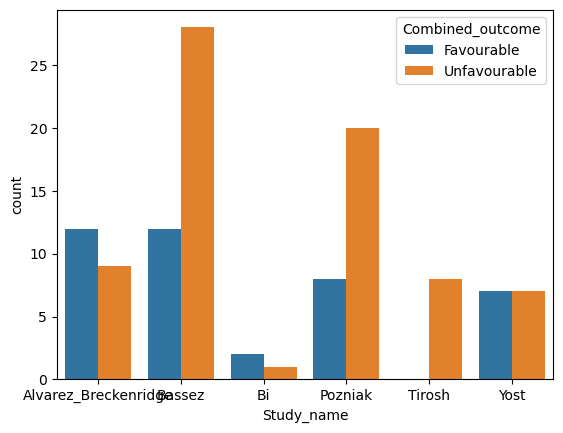

In [16]:
# what about R/NR/pre/post matrix?
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='Study_name', hue ='Combined_outcome', data = gondal_et_al_2025_not_jerby.obs.loc[:,['donor_id','Study_name','Combined_outcome']].drop_duplicates())

# Create a summary table for each study with counts of favourable and unfavourable pre/post cells and samples

# Prepare a DataFrame with only the relevant columns
df = gondal_et_al_2025_not_jerby.obs.loc[
    gondal_et_al_2025_not_jerby.obs['Combined_outcome'].isin(['Favourable', 'Unfavourable']),
    ['Study_name', 'Combined_outcome', 'pre_post', 'donor_id']
]
#print(df["donor_id"].nunique())
# Helper to generate counts for a given outcome
def get_counts(df, outcome, cell_prefix, sample_prefix):
    mask = df['Combined_outcome'] == outcome
    df_outcome = df.loc[mask]
    # Cell counts
    cell_counts = df_outcome.groupby(['Study_name', 'pre_post']).size().unstack(fill_value=0)
    cell_counts = cell_counts.rename(columns={'Pre': f'{cell_prefix}_Pre_cells', 'Post': f'{cell_prefix}_Post_cells'})
    # Sample counts
    sample_counts = df_outcome.groupby(['Study_name', 'pre_post'])['donor_id'].nunique().unstack(fill_value=0)
    sample_counts = sample_counts.rename(columns={'Pre': f'{sample_prefix}_Pre_samples', 'Post': f'{sample_prefix}_Post_samples'})
    # Merge
    return pd.concat([cell_counts, sample_counts], axis=1)

# Get tables for both outcomes
fav_table = get_counts(df, 'Favourable', 'R', 'R')
unfav_table = get_counts(df, 'Unfavourable', 'NR', 'NR')

# Combine all into a single summary table
summary_table = pd.concat([fav_table, unfav_table], axis=1).fillna(0).astype(int).reset_index()



# Display the table
print(summary_table)


In [17]:
# Let's debug why the total number of samples (donor_ids) calculated from the summary_table is different from the unique donor_ids in the AnnData object.

# 1. Calculate total unique donor_ids in the AnnData object (filtered for Favourable/Unfavourable)
unique_donors_in_obs = set(df['donor_id'].unique())
print(f"Unique donor_ids in AnnData (Favourable/Unfavourable): {len(unique_donors_in_obs)}")

# 2. Calculate total samples from summary_table
# The summary_table has columns like R_Pre_samples, R_Post_samples, NR_Pre_samples, NR_Post_samples
# We'll sum all these columns to get the total number of samples counted (but note: a donor can appear in multiple columns if they have both Pre and Post, or both R and NR)
sample_cols = [col for col in summary_table.columns if col.endswith('_samples')]
total_samples_from_table = summary_table[sample_cols].values.sum()
print(f"Total samples from summary_table (sum of all *_samples columns): {total_samples_from_table}")

# 3. Get all donor_ids represented in the summary_table (across all sample columns)
donor_ids_from_table = set()
for outcome in ['Favourable', 'Unfavourable']:
    for pre_post in ['Pre', 'Post']:
        mask = (df['Combined_outcome'] == outcome) & (df['pre_post'] == pre_post)
        donor_ids_from_table.update(df.loc[mask, 'donor_id'].unique())
print(f"Unique donor_ids represented in summary_table: {len(donor_ids_from_table)}")

# 4. Check for overlap and differences
print(f"Donor_ids in AnnData but not in summary_table: {unique_donors_in_obs - donor_ids_from_table}")
print(f"Donor_ids in summary_table but not in AnnData: {donor_ids_from_table - unique_donors_in_obs}")

# 5. Check if any donor_id is counted more than once in the summary_table (e.g., appears in both R and NR, or both Pre and Post)
# Let's count how many times each donor_id appears in the combinations
from collections import Counter
donor_combo_counter = Counter()
for outcome in ['Favourable', 'Unfavourable']:
    for pre_post in ['Pre', 'Post']:
        mask = (df['Combined_outcome'] == outcome) & (df['pre_post'] == pre_post)
        for donor in df.loc[mask, 'donor_id'].unique():
            donor_combo_counter[(donor, outcome, pre_post)] += 1

# Now, for each donor, count how many unique (outcome, pre_post) combos they have
donor_to_combos = {}
for (donor, outcome, pre_post), count in donor_combo_counter.items():
    donor_to_combos.setdefault(donor, set()).add((outcome, pre_post))
multi_combo_donors = {donor: combos for donor, combos in donor_to_combos.items() if len(combos) > 1}
print(f"Number of donor_ids with more than one (outcome, pre_post) combo: {len(multi_combo_donors)}")
if multi_combo_donors:
    print("Example donor with multiple combos:", list(multi_combo_donors.items())[:3])

# 6. Conclusion: The difference is likely because a single donor_id can contribute to multiple sample columns (e.g., both R_Pre_samples and NR_Post_samples), so summing the columns will overcount unique donors.

Unique donor_ids in AnnData (Favourable/Unfavourable): 114
Total samples from summary_table (sum of all *_samples columns): 168
Unique donor_ids represented in summary_table: 114
Donor_ids in AnnData but not in summary_table: set()
Donor_ids in summary_table but not in AnnData: set()
Number of donor_ids with more than one (outcome, pre_post) combo: 54
Example donor with multiple combos: [('su001', {('Favourable', 'Post'), ('Favourable', 'Pre')}), ('su002', {('Favourable', 'Post'), ('Favourable', 'Pre')}), ('su003', {('Favourable', 'Post'), ('Favourable', 'Pre')})]


In [18]:
# Check if any donor_id has both favourable and unfavourable cells
donor_outcomes = gondal_et_al_2025_not_jerby.obs.loc[
    gondal_et_al_2025_not_jerby.obs['Combined_outcome'].isin(['Favourable', 'Unfavourable']),
    ['donor_id', 'Combined_outcome']
].drop_duplicates()

# Group by donor_id and aggregate the set of outcomes
donor_outcome_sets = donor_outcomes.groupby('donor_id')['Combined_outcome'].agg(set)

# Find donor_ids with both outcomes
donors_with_both = donor_outcome_sets[donor_outcome_sets.apply(lambda x: {'Favourable', 'Unfavourable'}.issubset(x))]

print("Donor IDs with both favourable and unfavourable cells:")
print(donors_with_both.index.tolist())



Donor IDs with both favourable and unfavourable cells:
[]


In [19]:
# Check if there is a column with sample name and pre/post timing in AnnData.obs
obs_columns = gondal_et_al_2025_not_jerby.obs.columns

# Try to find a column that encodes both sample and pre/post information
sample_prepost_col = None
for col in obs_columns:
    col_lower = col.lower()
    if ('sample' in col_lower or 'name' in col_lower) and ('pre' in gondal_et_al_2025_not_jerby.obs[col].astype(str).str.lower().unique().tolist() or 'post' in gondal_et_al_2025_not_jerby.obs[col].astype(str).str.lower().unique().tolist()):
        sample_prepost_col = col
        break

if sample_prepost_col:
    print(f"Found column with sample name and pre/post timing: {sample_prepost_col}")
    print(gondal_et_al_2025_not_jerby.obs[[sample_prepost_col]].head())
else:
    # If not found, create a new column combining sample name and pre/post
    # Use 'Sample' and 'pre_post' columns if available
    if 'Sample' in obs_columns and 'pre_post' in obs_columns:
        gondal_et_al_2025_not_jerby.obs['sample_prepost'] = gondal_et_al_2025_not_jerby.obs['Sample'].astype(str) + "_" + gondal_et_al_2025_not_jerby.obs['pre_post'].astype(str)
        print("Created new column 'sample_prepost' combining 'Sample' and 'pre_post':")
        print(gondal_et_al_2025_not_jerby.obs[['Sample', 'pre_post', 'sample_prepost']].head())
    else:
        print("Could not find columns to create sample name with pre/post timing.")


Created new column 'sample_prepost' combining 'Sample' and 'pre_post':
                    Sample pre_post sample_prepost
M21_3p2_Lym_A01_S1  MEL021     Post    MEL021_Post
M21_3p2_Lym_A02_S2  MEL021     Post    MEL021_Post
M21_3p2_Lym_A03_S3  MEL021     Post    MEL021_Post
M21_3p2_Lym_A04_S4  MEL021     Post    MEL021_Post
M21_3p2_Lym_A05_S5  MEL021     Post    MEL021_Post


In [59]:
len(set(gondal_et_al_2025_not_jerby.obs.sample_prepost))

168

In [3]:
gondal_et_al_2025_not_jerby = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_final.h5ad")

In [4]:
gondal_et_al_2025_not_jerby.shape

(311006, 22781)

In [6]:
gondal_et_al_2025_not_jerby.obs["sample_prepost"]

M21_3p2_Lym_A01_S1                                             MEL021_Post
M21_3p2_Lym_A02_S2                                             MEL021_Post
M21_3p2_Lym_A03_S3                                             MEL021_Post
M21_3p2_Lym_A04_S4                                             MEL021_Post
M21_3p2_Lym_A05_S5                                             MEL021_Post
                                                                  ...     
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT     su008_Post
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TTCTTAGGTCTCACCT     su008_Post
Name: sample_prepost, Length: 311006, dtype: category
Categories (168, object): ['BIOKEY_2_Post', 'BIOKEY_2_Pre', 'BIOKEY_3_Post', 'BIOKEY_3_Pre', ..., 'su013_Post', 'su013_Pr

In [ ]:
gondal_et_al_2025_not_jerby_pre = gondal_et_al_2025_not_jerby[gondal_et_al_2025_not_jerby.obs["pre_post"] == "Pre"]
gondal_et_al_2025_not_jerby_pre.shape
#gondal_et_al_2025_not_jerby_pre.obs["sample_prepost"]


(129638, 22781)

In [17]:
len(gondal_et_al_2025_not_jerby_pre.obs["sample_prepost"].unique().tolist())

74

In [9]:
gondal_et_al_2025_not_jerby_pre.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_pre_fin.h5ad")

In [13]:
# now, filter out for t cells
t_cells_columns = ['T_cell',
                    'CD4_Tcells',
                    'Treg',
                    'CD8mem_Tcells',
                    'CD8ex_Tcells',
                    'Prolif_Tcell',
                    'CD8act_Tcells',
                    'CD8naive_Tcell'
                    'Th17'
                    'Naive_Tcell',
                    'Tfh',
                    'CD8eff_Tcell',
                    'CD8_Tcells',
                    'Lymphoid']

gondal_et_al_2025_not_jerby_t_cells_fin = gondal_et_al_2025_not_jerby_pre[gondal_et_al_2025_not_jerby_pre.obs['author_cell_type_update'].isin(t_cells_columns)]
gondal_et_al_2025_not_jerby_t_cells_fin.shape

(50455, 22781)

In [101]:
gondal_et_al_2025_not_jerby_t_cells_fin.obs["tissue_type"].unique()

['tissue']
Categories (1, object): ['tissue']

In [19]:
gondal_et_al_2025_not_jerby_t_cells_fin.obs["donor_id_pre_post"].unique().tolist()

['MEL033_Pre',
 'MEL019_Pre',
 'MEL027_Pre',
 'su001_Pre',
 'su002_Pre',
 'su003_Pre',
 'su004_Pre',
 'su005_Pre',
 'su006_Pre',
 'su007_Pre',
 'su008_Pre',
 'su009_Pre',
 'su010_Pre',
 'su012_Pre',
 'su011_Pre',
 'su013_Pre',
 'su014_Pre',
 'BIOKEY_10_Pre',
 'BIOKEY_16_Pre',
 'BIOKEY_14_Pre',
 'BIOKEY_19_Pre',
 'BIOKEY_23_Pre',
 'BIOKEY_26_Pre',
 'BIOKEY_28_Pre',
 'BIOKEY_3_Pre',
 'BIOKEY_15_Pre',
 'BIOKEY_8_Pre',
 'BIOKEY_5_Pre',
 'BIOKEY_30_Pre',
 'BIOKEY_12_Pre',
 'BIOKEY_31_Pre',
 'BIOKEY_20_Pre',
 'BIOKEY_22_Pre',
 'BIOKEY_25_Pre',
 'BIOKEY_21_Pre',
 'BIOKEY_29_Pre',
 'BIOKEY_4_Pre',
 'BIOKEY_9_Pre',
 'BIOKEY_18_Pre',
 'BIOKEY_11_Pre',
 'BIOKEY_7_Pre',
 'BIOKEY_2_Pre',
 'BIOKEY_6_Pre',
 'BIOKEY_17_Pre',
 'BIOKEY_27_Pre',
 'BIOKEY_24_Pre',
 'BIOKEY_33_Pre',
 'BIOKEY_38_Pre',
 'BIOKEY_35_Pre',
 'BIOKEY_36_Pre',
 'BIOKEY_41_Pre',
 'BIOKEY_32_Pre',
 'BIOKEY_40_Pre',
 'BIOKEY_37_Pre',
 'BIOKEY_34_Pre',
 'BIOKEY_39_Pre',
 'BIOKEY_42_Pre']

In [8]:
len(set(gondal_et_al_2025_not_jerby_pre.obs.sample_prepost))

74

In [20]:
# Change gene names using GTF parsing
# Load the gene length and extract gene_id <-> gene_symbol map from GTF format

gtf_path = '/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/compass/gencode.v36.annotation.gtf'

gene_id_to_symbol = {}

with open(gtf_path, 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        if fields[2] != 'gene':
            continue
        attributes_field = fields[8]
        attributes = {}
        for attr in attributes_field.strip().split(';'):
            attr = attr.strip()
            if attr == '':
                continue
            # For GTF: attribute format is key "value"
            # Sometimes attribute may not contain a space
            if ' ' not in attr:
                continue
            key, value = attr.split(' ', 1)
            value = value.strip().replace('"', '')
            attributes[key] = value
        gene_id = attributes.get('gene_id', None)
        gene_symbol = attributes.get('gene_name', None)
        if gene_id and gene_symbol:
            # Keep only full gene_id as key (no splitting version)
            gene_id_to_symbol[gene_id] = gene_symbol

# Convert to DataFrame for easier use, only the original gene_id (with version) and gene_symbol
gene_id_symbol_df = pd.DataFrame(
    [(gid, gsym) for gid, gsym in gene_id_to_symbol.items()],
    columns=['gene_id', 'gene_symbol']
)

gene_id_symbol_df.head()


,gene_id,gene_symbol
0,ENSG00000223972.5,DDX11L1
1,ENSG00000227232.5,WASH7P
2,ENSG00000278267.1,MIR6859-1
3,ENSG00000243485.5,MIR1302-2HG
4,ENSG00000284332.1,MIR1302-2


In [25]:
# Parse gencode.v19.chr_patch_hapl_scaff.annotation.gtf to extract symbol, Ensembl gene ID, and gene type

gtf_file = "./gencode.v19.chr_patch_hapl_scaff.annotation.gtf"

def parse_gtf_attributes(attr_string):
    """Parse the attribute column of a GTF file into a dict."""
    attrs = {}
    for attr in attr_string.strip().split(';'):
        if attr.strip() == '':
            continue
        key_value = attr.strip().split(' ', 1)
        if len(key_value) != 2:
            continue
        key, value = key_value
        attrs[key] = value.strip('"')
    return attrs

gtf_gene_info = []
with open(gtf_file, 'r') as gtf:
    for line in gtf:
        if line.startswith("#"):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        feature_type = fields[2]
        if feature_type != "gene":
            continue
        attr_dict = parse_gtf_attributes(fields[8])
        # gene_id (Ensembl), gene_name (symbol), gene_type
        gene_id = attr_dict.get('gene_id')
        gene_name = attr_dict.get('gene_name')
        # GTF files may use "gene_type" or "gene_biotype"
        gene_type = attr_dict.get('gene_type', attr_dict.get('gene_biotype'))
        # Only save if gene_id and gene_name present. gene_type can be None sometimes.
        if gene_id and gene_name:
            gtf_gene_info.append({'gene_id': gene_id, 'gene_name': gene_name, 'gene_type': gene_type})

import pandas as pd
gencode_v19_anno_df = pd.DataFrame(gtf_gene_info)
print("Number of annotated genes in gencode v19:", len(gencode_v19_anno_df))
print(gencode_v19_anno_df.head())


Number of annotated genes in gencode v19: 63568
             gene_id   gene_name   gene_type
0  ENSG00000223972.4     DDX11L1  pseudogene
1  ENSG00000227232.4      WASH7P  pseudogene
2  ENSG00000243485.2  MIR1302-11     lincRNA
3  ENSG00000237613.2     FAM138A     lincRNA
4  ENSG00000268020.2      OR4G4P  pseudogene


In [28]:
# Parse GRCh38 GFF (Ensembl annotation) to extract symbol, Ensembl gene ID, and gene biotype

grch38_gff_file = "./Homo_sapiens.GRCh38.115.gff3"  # Adjust path/filename as appropriate

def parse_gff3_attributes(attr_string):
    attrs = {}
    for attr in attr_string.strip().split(';'):
        if attr.strip() == '':
            continue
        key_value = attr.strip().split('=', 1)
        if len(key_value) != 2:
            continue
        key, value = key_value
        attrs[key] = value
    return attrs

gff_gene_info = []
with open(grch38_gff_file, 'r') as gff:
    for line in gff:
        if line.startswith("#"):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        feature_type = fields[2]
        if feature_type != "gene":
            continue
        attr_dict = parse_gff3_attributes(fields[8])
        gene_id = attr_dict.get('gene_id', attr_dict.get('ID'))
        gene_name = attr_dict.get('gene_name', attr_dict.get('Name'))
        gene_biotype = attr_dict.get('gene_biotype', attr_dict.get('biotype'))
        if gene_id and gene_name:
            gff_gene_info.append({'gene_id': gene_id, 'gene_name': gene_name, 'gene_biotype': gene_biotype})

grch38_anno_df = pd.DataFrame(gff_gene_info)
print("Number of annotated genes in GRCh38 GFF:", len(grch38_anno_df))
print(grch38_anno_df.head())


Number of annotated genes in GRCh38 GFF: 19906
           gene_id gene_name    gene_biotype
0  ENSG00000186092     OR4F5  protein_coding
1  ENSG00000284733    OR4F29  protein_coding
2  ENSG00000284662    OR4F16  protein_coding
3  ENSG00000187634    SAMD11  protein_coding
4  ENSG00000188976     NOC2L  protein_coding


In [ ]:
#gencode_v19_anno_df['gene_id_cleaned'] = gencode_v19_anno_df['gene_id'].str.split('.', expand=True)[0]
gene_id_symbol_df['gene_id_cleaned'] = gene_id_symbol_df['gene_id'].str.split('.', expand=True)[0]
gondal_et_al_2025_not_jerby_pre_genelist = gondal_et_al_2025_not_jerby_pre.var_names

gene_mapped = gene_id_symbol_df[gene_id_symbol_df['gene_id_cleaned'].isin(gondal_et_al_2025_not_jerby_pre_genelist)]

#print(len(set(gene_id_symbol_df['gene_id_cleaned']).intersection(gondal_et_al_2025_not_jerby_pre_genelist)))
difference_geneset = set(gondal_et_al_2025_not_jerby_pre_genelist)-set(gene_mapped)

#print(len(set(difference_geneset)))

#print(len(set(gencode_v19_anno_df['gene_id_cleaned']).intersection(difference_geneset)))
print(len(set(gondal_et_al_2025_not_jerby_pre_genelist)))
gene_mapped


22781


In [54]:
mapping_pd = pd.DataFrame(list(difference_geneset),columns=["gene_id_cleaned"])
mapping_pd["gene_symbol"] = mapping_pd["gene_id_cleaned"]
mapping_pd["gene_id"] = mapping_pd["gene_id_cleaned"]
gene_mapped_concat = pd.concat([gene_mapped,mapping_pd],axis=0)
gene_mapped_concat

,gene_id,gene_symbol,gene_id_cleaned
0,ENSG00000223972.5,DDX11L1,ENSG00000223972
1,ENSG00000227232.5,WASH7P,ENSG00000227232
3,ENSG00000243485.5,MIR1302-2HG,ENSG00000243485
5,ENSG00000237613.2,FAM138A,ENSG00000237613
8,ENSG00000186092.6,OR4F5,ENSG00000186092
...,...,...,...
41,ENSG00000292334,ENSG00000292334,ENSG00000292334
42,ENSG00000288705,ENSG00000288705,ENSG00000288705
43,ENSG00000292366,ENSG00000292366,ENSG00000292366
44,ENSG00000292363,ENSG00000292363,ENSG00000292363


In [60]:
gondal_et_al_2025_not_jerby_t_cells_fin.var["ensembl_id"] = gondal_et_al_2025_not_jerby_t_cells_fin.var_names
gondal_et_al_2025_not_jerby_t_cells_fin.var

,vf_vst_counts_mean,vf_vst_counts_variance,vf_vst_counts_variance.expected,vf_vst_counts_variance.standardized,vf_vst_counts_variable,vf_vst_counts_rank,var.features,var.features.rank,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,ensembl_id
ensembl_id,,,,,,,,,,,,,,,
ENSG00000139826,0.386643,75.312911,54.564740,1.380249,0,-2147483648,NA,-2147483648,False,ABHD13,NCBITaxon:9606,gene,5313,protein_coding,ENSG00000139826
ENSG00000158201,0.634549,108.992076,109.326975,0.996937,0,-2147483648,NA,-2147483648,False,ABHD3,NCBITaxon:9606,gene,1094,protein_coding,ENSG00000158201
ENSG00000281376,0.009735,0.082029,0.291714,0.281196,0,-2147483648,NA,-2147483648,False,ABALON,NCBITaxon:9606,gene,1903,lncRNA,ENSG00000281376
ENSG00000167972,0.060715,3.881741,3.832630,1.012814,0,-2147483648,NA,-2147483648,False,ABCA3,NCBITaxon:9606,gene,2440,protein_coding,ENSG00000167972
ENSG00000256661,0.001576,0.012407,0.029320,0.423161,0,-2147483648,NA,-2147483648,False,A2ML1-AS1,NCBITaxon:9606,gene,452,lncRNA,ENSG00000256661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000236719,0.002413,0.146083,0.051067,2.812950,1,1794,ENSG00000236719,1794,False,OVAAL,NCBITaxon:9606,gene,1506,lncRNA,ENSG00000236719
ENSG00000235054,0.000798,0.046288,0.010926,2.556470,0,-2147483648,NA,-2147483648,False,LINC01777,NCBITaxon:9606,gene,1347,lncRNA,ENSG00000235054
ENSG00000233431,0.000022,0.000022,0.000028,0.814522,0,-2147483648,NA,-2147483648,False,LINC02596,NCBITaxon:9606,gene,821,lncRNA,ENSG00000233431


In [61]:
mapping_dict = dict(zip(gene_mapped_concat["gene_id_cleaned"],gene_mapped_concat["gene_symbol"]))
gondal_et_al_2025_not_jerby_t_cells_fin.var.rename(mapping_dict,inplace=True)
gondal_et_al_2025_not_jerby_t_cells_fin.var
#gondal_et_al_2025_not_jerby_t_cells_fin.var_names
#gondal_et_al_2025_not_jerby_t_cells_fin.var_names
#gondal_et_al_2025_not_jerby_t_cells_fin.var_names


,vf_vst_counts_mean,vf_vst_counts_variance,vf_vst_counts_variance.expected,vf_vst_counts_variance.standardized,vf_vst_counts_variable,vf_vst_counts_rank,var.features,var.features.rank,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,ensembl_id
ensembl_id,,,,,,,,,,,,,,,
ABHD13,0.386643,75.312911,54.564740,1.380249,0,-2147483648,NA,-2147483648,False,ABHD13,NCBITaxon:9606,gene,5313,protein_coding,ENSG00000139826
ABHD3,0.634549,108.992076,109.326975,0.996937,0,-2147483648,NA,-2147483648,False,ABHD3,NCBITaxon:9606,gene,1094,protein_coding,ENSG00000158201
ABALON,0.009735,0.082029,0.291714,0.281196,0,-2147483648,NA,-2147483648,False,ABALON,NCBITaxon:9606,gene,1903,lncRNA,ENSG00000281376
ABCA3,0.060715,3.881741,3.832630,1.012814,0,-2147483648,NA,-2147483648,False,ABCA3,NCBITaxon:9606,gene,2440,protein_coding,ENSG00000167972
A2ML1-AS1,0.001576,0.012407,0.029320,0.423161,0,-2147483648,NA,-2147483648,False,A2ML1-AS1,NCBITaxon:9606,gene,452,lncRNA,ENSG00000256661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OVAAL,0.002413,0.146083,0.051067,2.812950,1,1794,ENSG00000236719,1794,False,OVAAL,NCBITaxon:9606,gene,1506,lncRNA,ENSG00000236719
LINC01777,0.000798,0.046288,0.010926,2.556470,0,-2147483648,NA,-2147483648,False,LINC01777,NCBITaxon:9606,gene,1347,lncRNA,ENSG00000235054
LINC02596,0.000022,0.000022,0.000028,0.814522,0,-2147483648,NA,-2147483648,False,LINC02596,NCBITaxon:9606,gene,821,lncRNA,ENSG00000233431


In [63]:
gondal_et_al_2025_not_jerby_t_cells_fin.var_names

Index(['ABHD13', 'ABHD3', 'ABALON', 'ABCA3', 'A2ML1-AS1', 'ABCC4', 'A2ML1-AS2',
       'ABCA13', 'AAR2', 'A2ML1',
       ...
       'SPATA42', 'LINC01701', 'LINC01349', 'LINC01681', 'LINC01712', 'OVAAL',
       'LINC01777', 'LINC02596', 'AIMP1P2', 'CHRM3-AS1'],
      dtype='object', name='ensembl_id', length=22781)

In [79]:
gondal_et_al_2025_not_jerby_t_cells_fin.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_t_cells_fin.h5ad")

In [ ]:
gondal_et_al_2025_not_jerby_t_cells_fin

In [80]:
gondal_et_al_2025_not_jerby_t_cells_fin.X.toarray()

array([[0.        , 1.10957898, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
gondal_et_al_2025_not_jerby_t_cells_fin.var["mt"] = gondal_et_al_2025_not_jerby_t_cells_fin.var_names.str.startswith("MT-")
# ribosomal genes
gondal_et_al_2025_not_jerby_t_cells_fin.var["ribo"] = gondal_et_al_2025_not_jerby_t_cells_fin.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
gondal_et_al_2025_not_jerby_t_cells_fin.var["hb"] = gondal_et_al_2025_not_jerby_t_cells_fin.var_names.str.contains("^HB[^(P)]")

In [66]:
sc.pp.calculate_qc_metrics(gondal_et_al_2025_not_jerby_t_cells_fin, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

In [68]:
sc.pp.filter_genes(gondal_et_al_2025_not_jerby_t_cells_fin, min_cells=3)


In [69]:
sc.tl.pca(gondal_et_al_2025_not_jerby_t_cells_fin)


In [70]:
sc.pp.neighbors(gondal_et_al_2025_not_jerby_t_cells_fin)
sc.tl.umap(gondal_et_al_2025_not_jerby_t_cells_fin)

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


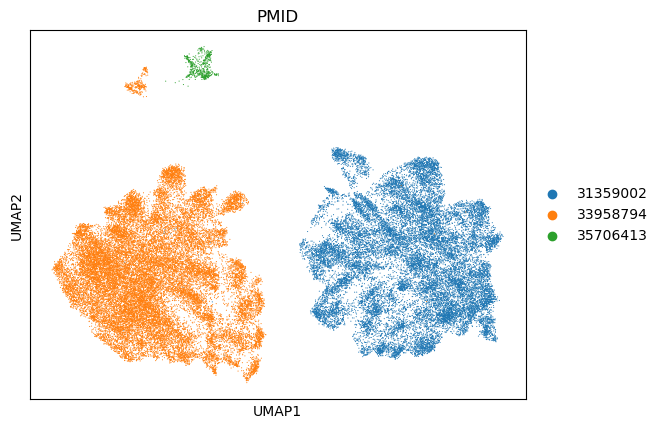

In [72]:
sc.pl.umap(gondal_et_al_2025_not_jerby_t_cells_fin, color="PMID")


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


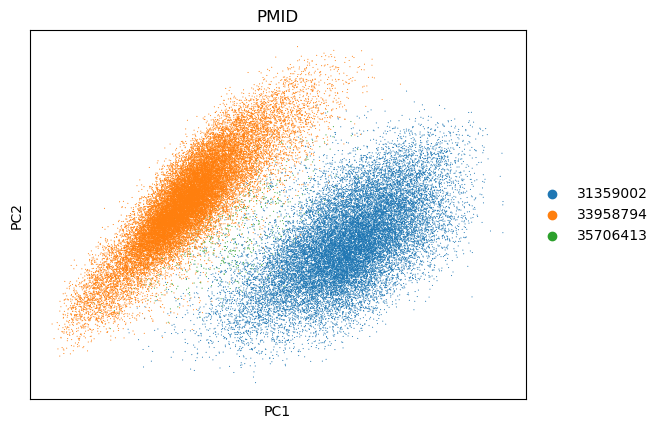

In [73]:
sc.pl.pca(gondal_et_al_2025_not_jerby_t_cells_fin, color="PMID")


In [83]:
gondal_et_al_2025_not_jerby_t_cells_fin.obs["donor_id_pre_post"]

M33p2_Lym_A03_S291                     MEL033_Pre
M33p2_Lym_A04_S292                     MEL033_Pre
M33p2_Lym_A05_S293                     MEL033_Pre
M33p2_Lym_A06_S294                     MEL033_Pre
M33p2_Lym_A07_S295                     MEL033_Pre
                                        ...      
BIOKEY_42_Pre_TTGTAGGTCGATAGAA-1    BIOKEY_42_Pre
BIOKEY_42_Pre_TTTATGCTCTCTTGAT-1    BIOKEY_42_Pre
BIOKEY_42_Pre_TTTGGTTGTGCCTTGG-1    BIOKEY_42_Pre
BIOKEY_42_Pre_TTTGTCAAGCTCCTCT-1    BIOKEY_42_Pre
BIOKEY_42_Pre_TTTGTCACACATTAGC-1    BIOKEY_42_Pre
Name: donor_id_pre_post, Length: 50455, dtype: category
Categories (57, object): ['BIOKEY_2_Pre', 'BIOKEY_3_Pre', 'BIOKEY_4_Pre', 'BIOKEY_5_Pre', ..., 'su011_Pre', 'su012_Pre', 'su013_Pre', 'su014_Pre']

In [95]:
# create a new matrix, calculate mean expression of the genes in the matrix based on the as 
# Group by 'donor_id_pre_post' and calculate mean expression for each gene
# The result should be a DataFrame: rows=genes (var_names), columns=donor_id_pre_post

import pandas as pd

gondal_et_al_2025_not_jerby_t_cells_fin.obs['response_binary'] = (gondal_et_al_2025_not_jerby_t_cells_fin.obs['Combined_outcome'] == "Favourable").astype(int)
# Get the gene expression matrix as DataFrame (cells x genes)
expr_df = pd.DataFrame(
    gondal_et_al_2025_not_jerby_t_cells_fin.X.toarray() if hasattr(gondal_et_al_2025_not_jerby_t_cells_fin.X, "toarray") else gondal_et_al_2025_not_jerby_t_cells_fin.X,
    index=gondal_et_al_2025_not_jerby_t_cells_fin.obs_names,
    columns=gondal_et_al_2025_not_jerby_t_cells_fin.var_names
)

# Add the donor_id_pre_post as a column for grouping
expr_df["donor_id_pre_post"] = gondal_et_al_2025_not_jerby_t_cells_fin.obs["donor_id_pre_post"].values

# Group by donor_id_pre_post and calculate the mean for each gene (across cells for each donor_id_pre_post)
means = expr_df.groupby("donor_id_pre_post").mean().transpose()  # genes as index, donor_id_pre_post as columns

# Now, attach 'response_binary' as the last row.
# We'll take response_binary for each donor_id_pre_post. Assume it's unique for each group:
resp_map = gondal_et_al_2025_not_jerby_t_cells_fin.obs[["donor_id_pre_post", "response_binary"]].drop_duplicates().set_index("donor_id_pre_post")["response_binary"]
# Make sure the mapping order matches the columns of 'means'
response_binary_row = resp_map.reindex(means.columns).astype(float)  # or int

# Append 'response_binary' as the last row
means_with_response = pd.concat([means, pd.DataFrame([response_binary_row.values], index=["Responder"], columns=means.columns)])
means
# Now, means_with_response is the matrix you described.
# means_with_response



donor_id_pre_post,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
ensembl_id,,,,,,,,,,,,,,,,,,,,,
ABHD13,0.140725,0.150685,0.143404,0.167456,0.239764,0.170521,0.196937,0.084947,0.276002,0.152882,...,0.199456,0.249566,0.136865,0.220644,0.185641,0.160493,0.142799,0.340345,0.209712,0.160789
ABHD3,0.126313,0.125084,0.129942,0.126422,0.147386,0.084589,0.159506,0.152818,0.217023,0.191902,...,0.210805,0.359525,0.393829,0.299145,0.124069,0.267218,0.443537,0.382708,0.215574,0.231450
ABALON,0.001182,0.000000,0.000399,0.001509,0.001765,0.000000,0.000000,0.000000,0.002703,0.000000,...,0.006534,0.001539,0.000000,0.005183,0.002260,0.005246,0.005884,0.005353,0.001642,0.004179
ABCA3,0.010704,0.002867,0.009368,0.007909,0.020128,0.000000,0.008427,0.023102,0.006489,0.000000,...,0.003822,0.001154,0.000000,0.000000,0.004005,0.002065,0.001472,0.005868,0.004206,0.002453
ABCC4,0.022580,0.029911,0.027142,0.029345,0.046078,0.000000,0.022876,0.025278,0.027095,0.020175,...,0.026612,0.024667,0.015584,0.030924,0.015229,0.018692,0.011469,0.020304,0.025072,0.028968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRBJ2-1,0.000000,0.000000,0.002582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRBJ2-3,0.000000,0.000000,0.004102,0.009959,0.000000,0.000000,0.000000,0.000000,0.000000,0.011382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRBJ2-4,0.000000,0.000000,0.002206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [97]:
means_with_response.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells.csv")

In [75]:
# remove batch effect
sc.external.pp.bbknn(gondal_et_al_2025_not_jerby_t_cells_fin, batch_key="PMID")  # running bbknn 1.3.6

In [76]:
sc.tl.umap(gondal_et_al_2025_not_jerby_t_cells_fin)


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


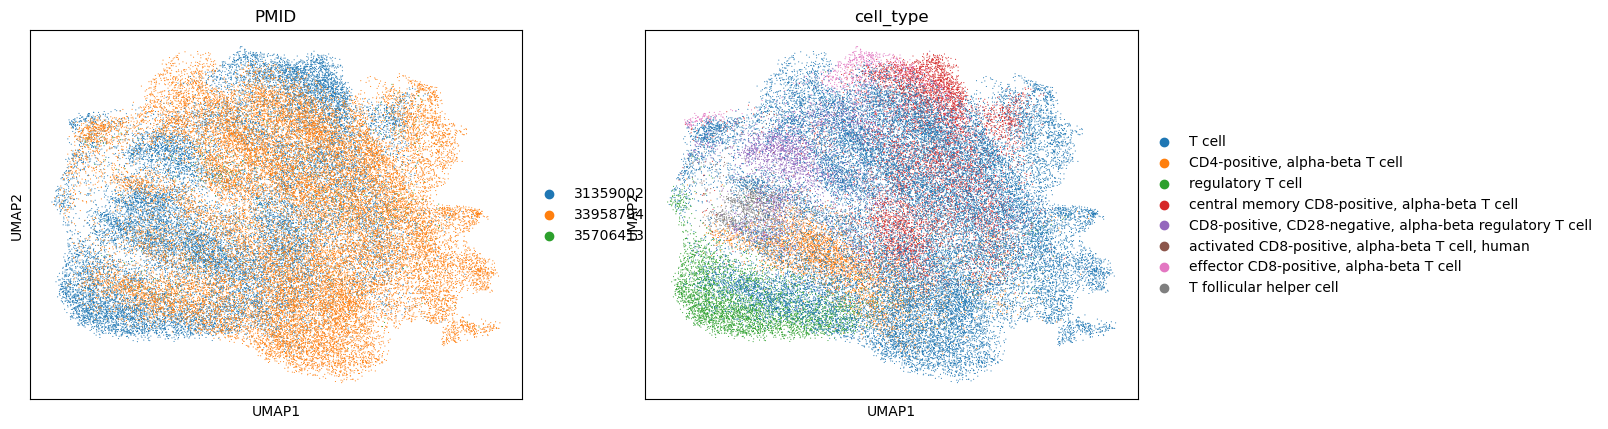

In [78]:
sc.pl.umap(gondal_et_al_2025_not_jerby_t_cells_fin, color=["PMID", "cell_type"])


In [49]:
gene_mapped

,gene_id,gene_symbol,gene_id_cleaned
0,ENSG00000223972.5,DDX11L1,ENSG00000223972
1,ENSG00000227232.5,WASH7P,ENSG00000227232
3,ENSG00000243485.5,MIR1302-2HG,ENSG00000243485
5,ENSG00000237613.2,FAM138A,ENSG00000237613
8,ENSG00000186092.6,OR4F5,ENSG00000186092
...,...,...,...
60655,ENSG00000198695.2,MT-ND6,ENSG00000198695
60656,ENSG00000210194.1,MT-TE,ENSG00000210194
60657,ENSG00000198727.2,MT-CYB,ENSG00000198727
60658,ENSG00000210195.2,MT-TT,ENSG00000210195


In [45]:
difference_geneset

{'ENSG00000274847',
 'ENSG00000277374',
 'ENSG00000288701',
 'ENSG00000288702',
 'ENSG00000288705',
 'ENSG00000288709',
 'ENSG00000288722',
 'ENSG00000288867',
 'ENSG00000289506',
 'ENSG00000289549',
 'ENSG00000289746',
 'ENSG00000289843',
 'ENSG00000290292',
 'ENSG00000290330',
 'ENSG00000290376',
 'ENSG00000290422',
 'ENSG00000290726',
 'ENSG00000291050',
 'ENSG00000291086',
 'ENSG00000291237',
 'ENSG00000292327',
 'ENSG00000292331',
 'ENSG00000292332',
 'ENSG00000292333',
 'ENSG00000292334',
 'ENSG00000292336',
 'ENSG00000292337',
 'ENSG00000292338',
 'ENSG00000292339',
 'ENSG00000292341',
 'ENSG00000292342',
 'ENSG00000292343',
 'ENSG00000292344',
 'ENSG00000292345',
 'ENSG00000292347',
 'ENSG00000292348',
 'ENSG00000292354',
 'ENSG00000292355',
 'ENSG00000292357',
 'ENSG00000292358',
 'ENSG00000292361',
 'ENSG00000292363',
 'ENSG00000292366',
 'ENSG00000292370',
 'ENSG00000292372',
 'ENSG00000292373'}

In [42]:
difference_geneset

{'ENSG00000274847',
 'ENSG00000277374',
 'ENSG00000288701',
 'ENSG00000288702',
 'ENSG00000288705',
 'ENSG00000288709',
 'ENSG00000288722',
 'ENSG00000288867',
 'ENSG00000289506',
 'ENSG00000289549',
 'ENSG00000289746',
 'ENSG00000289843',
 'ENSG00000290292',
 'ENSG00000290330',
 'ENSG00000290376',
 'ENSG00000290422',
 'ENSG00000290726',
 'ENSG00000291050',
 'ENSG00000291086',
 'ENSG00000291237',
 'ENSG00000292327',
 'ENSG00000292331',
 'ENSG00000292332',
 'ENSG00000292333',
 'ENSG00000292334',
 'ENSG00000292336',
 'ENSG00000292337',
 'ENSG00000292338',
 'ENSG00000292339',
 'ENSG00000292341',
 'ENSG00000292342',
 'ENSG00000292343',
 'ENSG00000292344',
 'ENSG00000292345',
 'ENSG00000292347',
 'ENSG00000292348',
 'ENSG00000292354',
 'ENSG00000292355',
 'ENSG00000292357',
 'ENSG00000292358',
 'ENSG00000292361',
 'ENSG00000292363',
 'ENSG00000292366',
 'ENSG00000292370',
 'ENSG00000292372',
 'ENSG00000292373'}

In [31]:
deepgenex_example = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/biomarkers/final_matrix.csv")

In [32]:
deepgenex_example.shape

(26324, 20)

In [ ]:
deepgenex_example_genelist = deepgenex_example["Gene"].tolist()
deepgenex_example_genelist

['TSPAN6',
 'TNMD',
 'DPM1',
 'SCYL3',
 'C1orf112',
 'FGR',
 'CFH',
 'FUCA2',
 'GCLC',
 'NFYA',
 'STPG1',
 'NIPAL3',
 'LAS1L',
 'ENPP4',
 'SEMA3F',
 'CFTR',
 'ANKIB1',
 'CYP51A1',
 'KRIT1',
 'RAD52',
 'MYH16',
 'BAD',
 'LAP3',
 'CD99',
 'HS3ST1',
 'AOC1',
 'WNT16',
 'HECW1',
 'MAD1L1',
 'LASP1',
 'SNX11',
 'TMEM176A',
 'M6PR',
 'KLHL13',
 'CYP26B1',
 'ICA1',
 'DBNDD1',
 'ALS2',
 'CASP10',
 'CFLAR',
 'TFPI',
 'NDUFAF7',
 'RBM5',
 'MTMR7',
 'SLC7A2',
 'ARF5',
 'SARM1',
 'POLDIP2',
 'PLXND1',
 'AK2',
 'CD38',
 'FKBP4',
 'KDM1A',
 'RBM6',
 'CAMKK1',
 'RECQL',
 'CCDC132',
 'HSPB6',
 'ARHGAP33',
 'NDUFAB1',
 'PDK4',
 'SLC22A16',
 'ZMYND10',
 'ABCB5',
 'ARX',
 'SLC25A13',
 'ST7',
 'CDC27',
 'SLC4A1',
 'CALCR',
 'HCCS',
 'DVL2',
 'PRSS22',
 'UPF1',
 'SKAP2',
 'SLC25A5',
 'CCDC109B',
 'HOXA11',
 'POLR2J',
 'DHX33',
 'MEOX1',
 'THSD7A',
 'LIG3',
 'RPAP3',
 'ACSM3',
 'AC004381.6',
 'CIAPIN1',
 'SPPL2B',
 'FAM214B',
 'COPZ2',
 'PRKAR2B',
 'MSL3',
 'CREBBP',
 'BZRAP1',
 'MPO',
 'PON1',
 'GCFC2',
 '

In [37]:
# Parse gencode.v19.chr_patch_hapl_scaff.annotation.gtf to extract symbol, Ensembl gene ID, and gene type

gtf_file = "./gencode.v19.chr_patch_hapl_scaff.annotation.gtf"

def parse_gtf_attributes(attr_string):
    """Parse the attribute column of a GTF file into a dict."""
    attrs = {}
    for attr in attr_string.strip().split(';'):
        if attr.strip() == '':
            continue
        key_value = attr.strip().split(' ', 1)
        if len(key_value) != 2:
            continue
        key, value = key_value
        attrs[key] = value.strip('"')
    return attrs

gtf_gene_info = []
with open(gtf_file, 'r') as gtf:
    for line in gtf:
        if line.startswith("#"):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        feature_type = fields[2]
        if feature_type != "gene":
            continue
        attr_dict = parse_gtf_attributes(fields[8])
        # gene_id (Ensembl), gene_name (symbol), gene_type
        gene_id = attr_dict.get('gene_id')
        gene_name = attr_dict.get('gene_name')
        # GTF files may use "gene_type" or "gene_biotype"
        gene_type = attr_dict.get('gene_type', attr_dict.get('gene_biotype'))
        # Only save if gene_id and gene_name present. gene_type can be None sometimes.
        if gene_id and gene_name:
            gtf_gene_info.append({'gene_id': gene_id, 'gene_name': gene_name, 'gene_type': gene_type})

import pandas as pd
gencode_v19_anno_df = pd.DataFrame(gtf_gene_info)
print("Number of annotated genes in gencode v19:", len(gencode_v19_anno_df))
print(gencode_v19_anno_df.head())


Number of annotated genes in gencode v19: 63568
             gene_id   gene_name   gene_type
0  ENSG00000223972.4     DDX11L1  pseudogene
1  ENSG00000227232.4      WASH7P  pseudogene
2  ENSG00000243485.2  MIR1302-11     lincRNA
3  ENSG00000237613.2     FAM138A     lincRNA
4  ENSG00000268020.2      OR4G4P  pseudogene


In [36]:
# Change gene names using GTF parsing
# Load the gene length and extract gene_id <-> gene_symbol map from GTF format

gtf_path = '/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/compass/gencode.v36.annotation.gtf'

gene_id_to_symbol = {}

with open(gtf_path, 'r') as gtf_file:
    for line in gtf_file:
        if line.startswith('#'):
            continue
        fields = line.strip().split('\t')
        if len(fields) < 9:
            continue
        if fields[2] != 'gene':
            continue
        attributes_field = fields[8]
        attributes = {}
        for attr in attributes_field.strip().split(';'):
            attr = attr.strip()
            if attr == '':
                continue
            # For GTF: attribute format is key "value"
            # Sometimes attribute may not contain a space
            if ' ' not in attr:
                continue
            key, value = attr.split(' ', 1)
            value = value.strip().replace('"', '')
            attributes[key] = value
        gene_id = attributes.get('gene_id', None)
        gene_symbol = attributes.get('gene_name', None)
        if gene_id and gene_symbol:
            # Keep only full gene_id as key (no splitting version)
            gene_id_to_symbol[gene_id] = gene_symbol

# Convert to DataFrame for easier use, only the original gene_id (with version) and gene_symbol
gene_id_symbol_df = pd.DataFrame(
    [(gid, gsym) for gid, gsym in gene_id_to_symbol.items()],
    columns=['gene_id', 'gene_symbol']
)

gene_id_symbol_df.head()


,gene_id,gene_symbol
0,ENSG00000223972.5,DDX11L1
1,ENSG00000227232.5,WASH7P
2,ENSG00000278267.1,MIR6859-1
3,ENSG00000243485.5,MIR1302-2HG
4,ENSG00000284332.1,MIR1302-2


In [40]:
gene_id_symbol_df["gene_id_cleaned"] = gene_id_symbol_df["gene_id"].str.split(".", expand=True)[0]
gene_id_symbol_df.head()


,gene_id,gene_symbol,gene_id_cleaned
0,ENSG00000223972.5,DDX11L1,ENSG00000223972
1,ENSG00000227232.5,WASH7P,ENSG00000227232
2,ENSG00000278267.1,MIR6859-1,ENSG00000278267
3,ENSG00000243485.5,MIR1302-2HG,ENSG00000243485
4,ENSG00000284332.1,MIR1302-2,ENSG00000284332


In [39]:
gencode_v19_anno_df["gene_id_cleaned"] = gencode_v19_anno_df["gene_id"].str.split(".", expand=True)[0]
gencode_v19_anno_df.head()


,gene_id,gene_name,gene_type,gene_id_cleaned
0,ENSG00000223972.4,DDX11L1,pseudogene,ENSG00000223972
1,ENSG00000227232.4,WASH7P,pseudogene,ENSG00000227232
2,ENSG00000243485.2,MIR1302-11,lincRNA,ENSG00000243485
3,ENSG00000237613.2,FAM138A,lincRNA,ENSG00000237613
4,ENSG00000268020.2,OR4G4P,pseudogene,ENSG00000268020


In [ ]:
gondal_genelist = gondal_et_al_2025_not_jerby.var_names.tolist()

# hg38
# load hg38 annotation file 
hg38_annotation = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/sup/Human.GRCh38.p13.annot.tsv", sep="\t")
hg38_annotation.head()
hg38_annotation_genelist = hg38_annotation.loc[:,["Symbol", "EnsemblGeneID"]]
gondal_genelist_map = set(gondal_genelist).intersection(set(gene_id_symbol_df["gene_id_cleaned"]))
print("Number of genes being mapped:", len(gondal_genelist_map))
print("Number of genes in gondal et al:", len(gondal_genelist))
gondal_genelist_unmap = set(gondal_genelist)-(set(gene_id_symbol_df["gene_id_cleaned"]))
print("Genes not being mapped:", gondal_genelist_unmap)
gondal_genelist_map_hg38 = set(gondal_genelist_unmap).intersection(set(hg38_annotation_genelist["EnsemblGeneID"]))
print("Number of genes being mapped to hg38:", len(gondal_genelist_map_hg38))

#gondal_genelist_not_map = gondal_genelist_map[gondal_genelist_map["gene_id_cleaned"].isin(gondal_genelist)]

#intersection_gondal_deepgenex = set(gondal_genelist).intersection(set(deepgenex_example_genelist))
#len(intersection_gondal_deepgenex)
#gondal_genelist



Number of genes being mapped: 22735
Number of genes in gondal et al: 22781
Genes not being mapped: {'ENSG00000274847', 'ENSG00000290726', 'ENSG00000290292', 'ENSG00000292337', 'ENSG00000292366', 'ENSG00000292341', 'ENSG00000288722', 'ENSG00000288867', 'ENSG00000292334', 'ENSG00000292348', 'ENSG00000292355', 'ENSG00000291237', 'ENSG00000289549', 'ENSG00000292327', 'ENSG00000292347', 'ENSG00000288702', 'ENSG00000290422', 'ENSG00000292354', 'ENSG00000292344', 'ENSG00000292372', 'ENSG00000292373', 'ENSG00000289843', 'ENSG00000292339', 'ENSG00000288705', 'ENSG00000292357', 'ENSG00000292361', 'ENSG00000289506', 'ENSG00000292333', 'ENSG00000292363', 'ENSG00000292338', 'ENSG00000290330', 'ENSG00000292358', 'ENSG00000291050', 'ENSG00000292370', 'ENSG00000292332', 'ENSG00000292336', 'ENSG00000292345', 'ENSG00000277374', 'ENSG00000289746', 'ENSG00000292331', 'ENSG00000291086', 'ENSG00000288701', 'ENSG00000290376', 'ENSG00000292343', 'ENSG00000288709', 'ENSG00000292342'}
Number of genes being mapp

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_36422/1220545056.py:5: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  hg38_annotation = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/sup/Human.GRCh38.p13.annot.tsv", sep="\t")


In [45]:

deepgenex_genelist_map = set(deepgenex_example_genelist).intersection(set(gencode_v19_anno_df["gene_name"]))
print("Number of genes being mapped:", len(deepgenex_genelist_map))
print("Number of genes in deepgenex:", len(deepgenex_example_genelist))
deepgenex_genelist_unmap = set(deepgenex_example_genelist)-(set(gencode_v19_anno_df["gene_name"]))
print("Genes not being mapped:", deepgenex_genelist_unmap)

Number of genes being mapped: 26323
Number of genes in deepgenex: 26324
Genes not being mapped: {'Responder'}


In [52]:
# rename the deepgenex genes to ensembl ids by hg19 gencode
name_mapping_dict = dict(zip(gencode_v19_anno_df["gene_name"], gencode_v19_anno_df["gene_id_cleaned"]))
deepgenex_example = deepgenex_example.set_index("Gene")
deepgenex_genelist_map_hg19 =  deepgenex_example.rename(index=name_mapping_dict)
deepgenex_genelist_map_hg19


,Pre_P1,Pre_P2,Pre_P3,Pre_P4,Pre_P6,Pre_P7,Pre_P8,Pre_P12,Pre_P15,Pre_P20,Pre_P24,Pre_P25,Pre_P26,Pre_P27,Pre_P28,Pre_P29,Pre_P31,Pre_P33,Pre_P35
Gene,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035000,0.003404,0.000000,0.024441,0.000000,0.000000,0.019458,0.000000,0.022500,0.000000,0.000000,0.019734,0.000000
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,2.084035,1.211250,0.874590,1.506129,1.631045,0.582343,0.684887,0.893070,1.187954,1.263043,0.689496,1.089324,0.887169,1.147281,0.961190,1.094444,1.269171,0.483370,0.748608
ENSG00000000457,0.303860,0.336399,0.399385,0.507581,0.383763,0.293842,0.230677,0.357599,0.215281,0.597826,0.476588,0.209405,0.209307,0.443713,0.414435,0.358333,0.308914,0.418936,0.382700
ENSG00000000460,0.257105,0.302083,0.465287,0.307258,0.398049,0.337956,0.158647,0.232310,0.085248,0.712205,0.212641,0.139811,0.169759,0.289737,0.257679,0.511358,0.398514,0.377539,0.442405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000224935,0.000000,0.015655,0.000000,0.018065,0.015331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016031,0.000000
ENSG00000237865,0.081535,0.059673,0.051762,0.055968,0.038571,0.004305,0.005865,0.086748,0.059637,0.037609,0.029496,0.069973,0.052108,0.135263,0.040893,0.027593,0.050400,0.034878,0.073080
ENSG00000224937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
deepgenex_genelist_map_hg19_genelist = deepgenex_genelist_map_hg19.index.tolist()
deepgenex_genelist_map_hg19_genelist


['ENSG00000000003',
 'ENSG00000000005',
 'ENSG00000000419',
 'ENSG00000000457',
 'ENSG00000000460',
 'ENSG00000000938',
 'ENSG00000000971',
 'ENSG00000001036',
 'ENSG00000001084',
 'ENSG00000001167',
 'ENSG00000001460',
 'ENSG00000001461',
 'ENSG00000001497',
 'ENSG00000001561',
 'ENSG00000001617',
 'ENSG00000001626',
 'ENSG00000001629',
 'ENSG00000001630',
 'ENSG00000001631',
 'ENSG00000002016',
 'ENSG00000002079',
 'ENSG00000002330',
 'ENSG00000002549',
 'ENSGR0000002586',
 'ENSG00000002587',
 'ENSG00000002726',
 'ENSG00000002745',
 'ENSG00000002746',
 'ENSG00000002822',
 'ENSG00000002834',
 'ENSG00000002919',
 'ENSG00000002933',
 'ENSG00000003056',
 'ENSG00000003096',
 'ENSG00000003137',
 'ENSG00000003147',
 'ENSG00000003249',
 'ENSG00000003393',
 'ENSG00000003400',
 'ENSG00000003402',
 'ENSG00000003436',
 'ENSG00000003509',
 'ENSG00000003756',
 'ENSG00000003987',
 'ENSG00000003989',
 'ENSG00000004059',
 'ENSG00000267556',
 'ENSG00000262464',
 'ENSG00000004399',
 'ENSG00000004455',


In [56]:
# overlap between deepgenex and gondal
deepgenex_genelist_map_hg19_genelist_overlap = set(deepgenex_genelist_map_hg19_genelist).intersection(set(gondal_genelist))
deepgenex_genelist_map_hg19_genelist_overlap




{'ENSG00000148842',
 'ENSG00000179869',
 'ENSG00000105767',
 'ENSG00000133112',
 'ENSG00000207003',
 'ENSG00000175766',
 'ENSG00000220891',
 'ENSG00000154265',
 'ENSG00000147127',
 'ENSG00000077549',
 'ENSG00000198742',
 'ENSG00000127399',
 'ENSG00000215559',
 'ENSG00000079931',
 'ENSG00000178997',
 'ENSG00000204524',
 'ENSG00000111786',
 'ENSG00000189431',
 'ENSG00000198832',
 'ENSG00000125454',
 'ENSG00000169306',
 'ENSG00000103546',
 'ENSG00000144476',
 'ENSG00000182220',
 'ENSG00000188693',
 'ENSG00000148308',
 'ENSG00000141570',
 'ENSG00000105287',
 'ENSG00000174898',
 'ENSG00000149761',
 'ENSG00000164106',
 'ENSG00000126016',
 'ENSG00000134588',
 'ENSG00000110900',
 'ENSG00000204311',
 'ENSG00000137807',
 'ENSG00000170234',
 'ENSG00000141458',
 'ENSG00000148660',
 'ENSG00000052802',
 'ENSG00000157212',
 'ENSG00000112658',
 'ENSG00000204177',
 'ENSG00000128335',
 'ENSG00000112183',
 'ENSG00000150961',
 'ENSG00000110075',
 'ENSG00000197549',
 'ENSG00000135245',
 'ENSG00000101868',


In [59]:
# subset the both the deepgenex matrix and the gondal matrix by the overlapped genelist
deepgenex_genelist_subset = deepgenex_genelist_map_hg19.loc[list(deepgenex_genelist_map_hg19_genelist_overlap)]
deepgenex_genelist_subset







,Pre_P1,Pre_P2,Pre_P3,Pre_P4,Pre_P6,Pre_P7,Pre_P8,Pre_P12,Pre_P15,Pre_P20,Pre_P24,Pre_P25,Pre_P26,Pre_P27,Pre_P28,Pre_P29,Pre_P31,Pre_P33,Pre_P35
Gene,,,,,,,,,,,,,,,,,,,
ENSG00000148842,0.093596,0.037321,0.335369,0.201710,0.044286,0.083842,0.164925,0.151429,0.193762,0.116553,0.091128,0.089649,0.058223,0.153392,0.142827,0.095864,0.081457,0.168293,0.180717
ENSG00000179869,0.031272,0.000000,0.000000,0.012258,0.001185,0.006594,0.001541,0.023739,0.001386,0.005497,0.005045,0.001459,0.000000,0.000000,0.002946,0.035370,0.001657,0.005233,0.014135
ENSG00000105767,0.000000,0.000000,0.000000,0.015839,0.013589,0.000000,0.000000,0.010456,0.000000,0.000000,0.030653,0.000000,0.010331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000133112,9.560044,10.835565,11.895369,11.208129,10.818850,12.123052,11.614624,11.444559,10.833036,11.328292,10.287389,10.950054,10.777952,11.374386,12.162887,11.257222,9.344429,9.725322,9.036076
ENSG00000207003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032671,0.025027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000026751,2.511053,2.187798,1.935984,2.937355,4.330279,1.432534,1.206429,2.767629,2.444851,3.091491,1.441365,2.274676,0.947410,4.438099,1.877827,1.270617,1.847429,1.802528,0.689409
ENSG00000164107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000198429,0.123509,0.031339,0.056025,0.187161,0.161777,0.049755,0.107368,0.021763,0.089769,0.023385,0.046380,0.050135,0.066446,0.120936,0.087143,0.034691,0.048229,0.157295,0.017215


In [72]:
# also subset the gondal matrix
gondal_genelist_subset = gondal_et_al_2025_not_jerby[:, list(deepgenex_genelist_map_hg19_genelist_overlap)]
gondal_genelist_subset

View of AnnData object with n_obs × n_vars = 311006 × 16997
    obs: 'PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type', 'author_cell_type_update', 'outcome', 'Combined_outcome', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_prepost'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_

In [63]:
ensid_to_symbol_dict = dict(zip(gencode_v19_anno_df["gene_id_cleaned"], gencode_v19_anno_df["gene_name"]))
ensid_to_symbol_dict


{'ENSG00000223972': 'DDX11L1',
 'ENSG00000227232': 'WASH7P',
 'ENSG00000243485': 'MIR1302-11',
 'ENSG00000237613': 'FAM138A',
 'ENSG00000268020': 'OR4G4P',
 'ENSG00000240361': 'OR4G11P',
 'ENSG00000186092': 'OR4F5',
 'ENSG00000238009': 'RP11-34P13.7',
 'ENSG00000239945': 'RP11-34P13.8',
 'ENSG00000233750': 'CICP27',
 'ENSG00000237683': 'AL627309.1',
 'ENSG00000268903': 'RP11-34P13.15',
 'ENSG00000269981': 'RP11-34P13.16',
 'ENSG00000239906': 'RP11-34P13.14',
 'ENSG00000241860': 'RP11-34P13.13',
 'ENSG00000222623': 'RNU6-1100P',
 'ENSG00000241599': 'RP11-34P13.9',
 'ENSG00000228463': 'AP006222.2',
 'ENSG00000241670': 'AP006222.1',
 'ENSG00000237094': 'RP4-669L17.10',
 'ENSG00000250575': 'RP4-669L17.8',
 'ENSG00000233653': 'CICP7',
 'ENSG00000224813': 'RP4-669L17.4',
 'ENSG00000235249': 'OR4F29',
 'ENSG00000269732': 'WBP1LP7',
 'ENSG00000256186': 'AL732372.1',
 'ENSG00000236601': 'RP4-669L17.2',
 'ENSG00000236743': 'RP5-857K21.15',
 'ENSG00000236679': 'RP4-669L17.1',
 'ENSG00000231709': 

In [68]:
ensid_to_symbol_dict_df = pd.DataFrame(list(ensid_to_symbol_dict.items()), columns=['gene_id_cleaned', 'gene_name'])
ensid_to_symbol_dict_df


,gene_id_cleaned,gene_name
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000243485,MIR1302-11
3,ENSG00000237613,FAM138A
4,ENSG00000268020,OR4G4P
...,...,...
63563,ENSG00000241559,CU459202.2
63564,ENSG00000264728,CU442762.3
63565,ENSG00000238667,CU442762.2
63566,ENSG00000238477,CU442762.1


In [ ]:
# Then, change both the deepgenex matrix and the gondal matrix to gene symbols
deepgenex_genelist_subset_symbol = deepgenex_genelist_subset.rename(index=ensid_to_symbol_dict)
deepgenex_genelist_subset_symbol


In [76]:

gondal_genelist_subset.var.rename(ensid_to_symbol_dict, inplace=True)
gondal_genelist_subset

View of AnnData object with n_obs × n_vars = 311006 × 16997
    obs: 'PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type', 'author_cell_type_update', 'outcome', 'Combined_outcome', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_prepost'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_

In [77]:
gondal_genelist_subset.var_names

Index(['CNNM2', 'ABCA13', 'CADM4', 'TPT1', 'RNU6-611P', 'EIF4E1B',
       'LL22NC03-63E9.3', 'ABCA5', 'RAB41', 'CAPZB',
       ...
       'RAB4A', 'DNAJC9', 'DSCAML1', 'TRAV10', 'F7', 'SLAMF7', 'HAND2',
       'ZNF69', 'SEC23B', 'LACRT'],
      dtype='object', name='ensembl_id', length=16997)

In [78]:
# now, save both the deepgenex and the gondal matrix in the symbol format
deepgenex_genelist_subset_symbol.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/deepgenex_genelist_subset.csv")
gondal_genelist_subset.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_genelist_subset.h5ad")





In [58]:
gondal_genelist_subset = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_genelist_subset.h5ad")
gondal_genelist_subset

AnnData object with n_obs × n_vars = 311006 × 16997
    obs: 'PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type', 'author_cell_type_update', 'outcome', 'Combined_outcome', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_prepost'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance

In [9]:
gondal_genelist_subset.obs["response_binary"] = gondal_genelist_subset.obs["Combined_outcome"].map({"Favourable": 1, "Unfavourable": 0})
gondal_genelist_subset.obs["response_binary"]


M21_3p2_Lym_A01_S1                                             1
M21_3p2_Lym_A02_S2                                             1
M21_3p2_Lym_A03_S3                                             1
M21_3p2_Lym_A04_S4                                             1
M21_3p2_Lym_A05_S5                                             1
                                                              ..
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCAGCTCAGGTGATAT    0
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCCACACGTGTCCTCT    0
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TCGGGACTCGGAGGTA    0
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TGGCCAGCAATACGCT    0
BCC_previous_BCC_bcc.su008.post.tumor.cd45_TTCTTAGGTCTCACCT    0
Name: response_binary, Length: 311006, dtype: category
Categories (2, int64): [1, 0]

In [17]:
# create a new matrix, calculate mean expression of the genes in the matrix based on the as 
# Group by 'donor_id_pre_post' and calculate mean expression for each gene
# The result should be a DataFrame: rows=genes (var_names), columns=donor_id_pre_post

import pandas as pd

gondal_genelist_subset_pre = gondal_genelist_subset[gondal_genelist_subset.obs["pre_post"] == "Pre"]

# Get the gene expression matrix as DataFrame (cells x genes)
expr_df = pd.DataFrame(
    gondal_genelist_subset_pre.X.toarray() if hasattr(gondal_genelist_subset_pre.X, "toarray") else gondal_genelist_subset_pre.X,
    index=gondal_genelist_subset_pre.obs_names,
    columns=gondal_genelist_subset_pre.var_names
)

# Add the donor_id_pre_post as a column for grouping
expr_df["donor_id_pre_post"] = gondal_genelist_subset_pre.obs["donor_id_pre_post"].values

# Group by donor_id_pre_post and calculate the mean for each gene (across cells for each donor_id_pre_post)
means = expr_df.groupby("donor_id_pre_post").mean().transpose()  # genes as index, donor_id_pre_post as columns

# Now, attach 'response_binary' as the last row.
# We'll take response_binary for each donor_id_pre_post. Assume it's unique for each group:
resp_map = gondal_genelist_subset_pre.obs[["donor_id_pre_post", "response_binary"]].drop_duplicates().set_index("donor_id_pre_post")["response_binary"]
# Make sure the mapping order matches the columns of 'means'
response_binary_row = resp_map.reindex(means.columns).astype(float)  # or int

# Append 'response_binary' as the last row
#means_with_response = means.append(pd.DataFrame([response_binary_row.values], index=["response_binary"], columns=means.columns))
means
# Now, means_with_response is the matrix you described.
# means_with_response



donor_id_pre_post,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
ensembl_id,,,,,,,,,,,,,,,,,,,,,
CNNM2,0.031861,0.030289,0.020533,0.024343,0.015835,0.038400,0.059695,0.011338,0.015907,0.008611,...,0.044806,0.036498,0.027061,0.039852,0.025302,0.058478,0.027586,0.051552,0.046661,0.058246
ABCA13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,0.000509,0.000000,...,0.001924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CADM4,0.014681,0.011025,0.011686,0.006695,0.040485,0.045126,0.007333,0.020961,0.011553,0.004182,...,0.008356,0.009449,0.001775,0.005105,0.001513,0.000000,0.001316,0.000512,0.000302,0.000599
TPT1,3.713578,3.371391,3.605831,3.552984,3.375249,3.835249,3.196183,2.989861,2.815708,3.638530,...,4.094180,3.909963,3.946033,4.038836,3.817804,3.976432,3.722655,4.170699,3.726857,4.157912
RNU6-611P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLAMF7,0.055998,0.016953,0.114774,0.122613,0.032787,0.013008,0.233031,0.033590,0.094503,0.084457,...,0.221163,0.176095,0.128387,0.128167,0.054386,0.086052,0.083218,0.049359,0.031030,0.142831
HAND2,0.006371,0.059494,0.001341,0.000000,0.010301,0.013089,0.000000,0.003136,0.004737,0.000000,...,0.001140,0.000816,0.000000,0.002244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNF69,0.016831,0.027735,0.015641,0.014706,0.017282,0.035065,0.000000,0.018014,0.011341,0.008577,...,0.004667,0.004044,0.001676,0.003415,0.004039,0.002473,0.001907,0.002287,0.002032,0.000000


In [19]:
means.shape

(16997, 74)

In [30]:
deepgenex_example

NameError: name 'deepgenex_example' is not defined

In [ ]:
response_df = pd.DataFrame([response_binary_row.values], index=["Responder"], columns=means.columns)
means_with_response = pd.concat([means, response_df], axis=0)






donor_id_pre_post,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
CNNM2,0.031861,0.030289,0.020533,0.024343,0.015835,0.038400,0.059695,0.011338,0.015907,0.008611,...,0.044806,0.036498,0.027061,0.039852,0.025302,0.058478,0.027586,0.051552,0.046661,0.058246
ABCA13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,0.000509,0.000000,...,0.001924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CADM4,0.014681,0.011025,0.011686,0.006695,0.040485,0.045126,0.007333,0.020961,0.011553,0.004182,...,0.008356,0.009449,0.001775,0.005105,0.001513,0.000000,0.001316,0.000512,0.000302,0.000599
TPT1,3.713578,3.371391,3.605831,3.552984,3.375249,3.835249,3.196183,2.989861,2.815708,3.638530,...,4.094180,3.909963,3.946033,4.038836,3.817804,3.976432,3.722655,4.170699,3.726857,4.157912
RNU6-611P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HAND2,0.006371,0.059494,0.001341,0.000000,0.010301,0.013089,0.000000,0.003136,0.004737,0.000000,...,0.001140,0.000816,0.000000,0.002244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZNF69,0.016831,0.027735,0.015641,0.014706,0.017282,0.035065,0.000000,0.018014,0.011341,0.008577,...,0.004667,0.004044,0.001676,0.003415,0.004039,0.002473,0.001907,0.002287,0.002032,0.000000
SEC23B,0.139322,0.077512,0.129500,0.091491,0.165381,0.173413,0.100820,0.078002,0.125567,0.157417,...,0.166513,0.201661,0.196309,0.192989,0.244897,0.194033,0.259484,0.214074,0.273564,0.237018
LACRT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
means_with_response.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/mean_with_response.csv")

In [3]:
first_line_data

['A10_P3_M11',
 'A11_P1_M11',
 'A11_P3_M11',
 'A11_P4_M11',
 'A12_P3_M11',
 'A12_P6_M11',
 'A2_P1_M11',
 'A2_P4_M11',
 'A3_P1_M11',
 'A3_P3_M11',
 'A4_P3_M11',
 'A4_P4_M11',
 'A4_P6_M11',
 'A5_P4_M11',
 'A5_P5_M11',
 'A6_P1_M11',
 'A6_P4_M11',
 'A6_P6_M11',
 'A7_P2_M11',
 'A7_P6_M11',
 'A8_P1_M11',
 'A8_P6_M11',
 'A9_P1_M11',
 'A9_P4_M11',
 'B10_P1_M11',
 'B10_P3_M11',
 'B10_P4_M11',
 'B10_P6_M11',
 'B11_P6_M11',
 'B12_P3_M11',
 'B12_P4_M11',
 'B1_P2_M11',
 'B1_P4_M11',
 'B2_P1_M11',
 'B2_P5_M11',
 'B2_P6_M11',
 'B3_P1_M11',
 'B3_P5_M11',
 'B4_P1_M11',
 'B4_P4_M11',
 'B4_P6_M11',
 'B5_P1_M11',
 'B5_P6_M11',
 'B6_P1_M11',
 'B7_P4_M11',
 'B8_P6_M11',
 'B9_P2_M11',
 'C10_P4_M11',
 'C10_P6_M11',
 'C11_P4_M11',
 'C11_P6_M11',
 'C12_P4_M11',
 'C1_P3_M11',
 'C1_P4_M11',
 'C2_P6_M11',
 'C3_P1_M11',
 'C4_P1_M11',
 'C4_P3_M11',
 'C4_P4_M11',
 'C4_P6_M11',
 'C5_P3_M11',
 'C5_P5_M11',
 'C5_P6_M11',
 'C6_P2_M11',
 'C6_P3_M11',
 'C6_P4_M11',
 'C7_P3_M11',
 'C7_P5_M11',
 'C7_P6_M11',
 'C8_P3_M11',
 '

In [4]:
import pandas as pd
sade_et_al_remain = pd.read_table(file_path, skiprows=2, sep='\t', header=None)
sade_et_al_remain.head()

,0,1,2,3,4,5,6,7,8,9,...,16283,16284,16285,16286,16287,16288,16289,16290,16291,16292
0,TSPAN6,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
1,TNMD,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
2,DPM1,0.0,9.24,0.0,7.99,0.0,0.0,0.0,0.0,8.44,...,6.60,0.00,0.0,0.00,7.34,0.0,0.0,0.0,0.0,NaN
3,SCYL3,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,5.15,2.54,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
4,C1orf112,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,8.03,0.00,0.0,0.61,7.65,0.0,0.0,0.0,0.0,NaN


In [5]:
sade_et_al_remain.head()

,0,1,2,3,4,5,6,7,8,9,...,16283,16284,16285,16286,16287,16288,16289,16290,16291,16292
0,TSPAN6,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
1,TNMD,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
2,DPM1,0.0,9.24,0.0,7.99,0.0,0.0,0.0,0.0,8.44,...,6.60,0.00,0.0,0.00,7.34,0.0,0.0,0.0,0.0,NaN
3,SCYL3,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,5.15,2.54,0.0,0.00,0.00,0.0,0.0,0.0,0.0,NaN
4,C1orf112,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,8.03,0.00,0.0,0.61,7.65,0.0,0.0,0.0,0.0,NaN


In [6]:
# 重新读取文件以确保变量被正确定义
file_path = '/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt'
with open(file_path, 'r') as f:
    first_line = f.readline().strip()
    second_line = f.readline().strip()

first_line_data = first_line.split('\t')
second_line_data = second_line.split('\t')

# Add 'cell_name' to the first item of first_line_data
first_line_add = ['Gene']
first_line_add.extend(first_line_data)
# Add 'sample_name' to the second item of second_line_data (assuming "second item" means at index 1)
second_line_add = ['Gene']
second_line_add.extend(second_line_data)

# Use the columns from sade_et_al_remain and set those as the next row
# Reset the columns of the dataframe to range index to prep for row appending
#sade_et_al_remain.columns = range(len(columns_row))

second_line_add


['Gene',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 'Pre_P1',
 

In [7]:
import pandas as pd
prepend_df = pd.DataFrame([first_line_add, second_line_add])
prepend_df

,0,1,2,3,4,5,6,7,8,9,...,16282,16283,16284,16285,16286,16287,16288,16289,16290,16291
0,Gene,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,...,H12_P5_M67_L001_T_enriched,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched
1,Gene,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,...,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched


In [16]:
sade_et_al_remain = sade_et_al_remain.iloc[:, :-1]
sade_et_al_remain.head()

,0,1,2,3,4,5,6,7,8,9,...,16282,16283,16284,16285,16286,16287,16288,16289,16290,16291
0,TSPAN6,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,TNMD,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,DPM1,0.0,9.24,0.0,7.99,0.0,0.0,0.0,0.0,8.44,...,0.0,6.60,0.00,0.0,0.00,7.34,0.0,0.0,0.0,0.0
3,SCYL3,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,5.15,2.54,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,C1orf112,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,8.03,0.00,0.0,0.61,7.65,0.0,0.0,0.0,0.0


In [18]:
prepend_df

,0,1,2,3,4,5,6,7,8,9,...,16282,16283,16284,16285,16286,16287,16288,16289,16290,16291
0,Gene,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,...,H12_P5_M67_L001_T_enriched,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched
1,Gene,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,...,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched


In [8]:
combined_df = pd.concat([prepend_df, sade_et_al_remain], ignore_index=False)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16283,16284,16285,16286,16287,16288,16289,16290,16291,16292
0,Gene,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,...,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched,NaN
1,Gene,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,...,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,NaN
0,TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,TNMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,DPM1,0.0,9.24,0.0,7.99,0.0,0.0,0.0,0.0,8.44,...,6.6,0.0,0.0,0.0,7.34,0.0,0.0,0.0,0.0,NaN


In [16]:
combined_df_processed = combined_df.iloc[:, :-1]
combined_df_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,16282,16283,16284,16285,16286,16287,16288,16289,16290,16291
0,Gene,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,...,H12_P5_M67_L001_T_enriched,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched
1,Gene,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,...,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched
0,TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TNMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1,0.0,9.24,0.0,7.99,0.0,0.0,0.0,0.0,8.44,...,0.0,6.6,0.0,0.0,0.0,7.34,0.0,0.0,0.0,0.0


In [10]:
combined_df.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/combined_df.csv')

In [14]:
# create a h5ad file with combined_df and metadata
metadata_sade = pd.read_excel('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/GSE120575_patient_ID.xlsx')
metadata_sade.head()

,Sample,cell_id,Histology,Species,sample_id,outcome,therapy
0,Sample 1,A10_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
1,Sample 2,A11_P1_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
2,Sample 3,A11_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
3,Sample 4,A11_P4_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
4,Sample 5,A12_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4


In [15]:
metadata_sade.set_index('cell_id', inplace=True)
metadata_sade.head()

,Sample,Histology,Species,sample_id,outcome,therapy
cell_id,,,,,,
A10_P3_M11,Sample 1,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
A11_P1_M11,Sample 2,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
A11_P3_M11,Sample 3,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
A11_P4_M11,Sample 4,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4
A12_P3_M11,Sample 5,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti-CTLA4


In [1]:
import pandas as pd
combined_df_processed = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/combined_df_processed.csv')
combined_df_processed.head()

,0,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,RP11-126K1.9,RP4-671G15.2,OR6R2P,RP11-225H22.7,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4,RP11-180C16.1,AP000230.1,RP11-80H18.4
0,A10_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0
1,A11_P1_M11,0.0,0.0,9.24,0.0,0.0,0.0,0.0,0.0,1.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A11_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A11_P4_M11,0.0,0.0,7.99,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A12_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
combined_df_processed.rename(columns={'0': 'cell_id'}, inplace=True)
combined_df_processed.head()
# remove the second line of combined_df_processed

# create gene var matrix
#gene_df = combined_df_processed.iloc[:, 0]
#gene_df.head()

,cell_id,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,RP11-126K1.9,RP4-671G15.2,OR6R2P,RP11-225H22.7,RP11-731C17.2,RP4-621B10.8,RP11-114I8.4,RP11-180C16.1,AP000230.1,RP11-80H18.4
0,A10_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0
1,A11_P1_M11,0.0,0.0,9.24,0.0,0.0,0.0,0.0,0.0,1.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A11_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A11_P4_M11,0.0,0.0,7.99,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A12_P3_M11,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# remove the row with nan index 
combined_df_processed = combined_df_processed[~combined_df_processed.index.isna()]
combined_df_processed.shape
# create gene var matrix

(16291, 55737)

In [13]:
gene_df = pd.DataFrame(combined_df_processed.columns.tolist(), columns=['Gene'])
gene_df.set_index('Gene', inplace=True)
gene_df.head()

""
Gene
TSPAN6
TNMD
DPM1
SCYL3
C1orf112


In [27]:
list(set(combined_df_processed.index).difference(set(metadata_sade.index)))

[nan]

In [23]:
combined_df_processed.index.tolist()

['A10_P3_M11',
 'A11_P1_M11',
 'A11_P3_M11',
 'A11_P4_M11',
 'A12_P3_M11',
 'A12_P6_M11',
 'A2_P1_M11',
 'A2_P4_M11',
 'A3_P1_M11',
 'A3_P3_M11',
 'A4_P3_M11',
 'A4_P4_M11',
 'A4_P6_M11',
 'A5_P4_M11',
 'A5_P5_M11',
 'A6_P1_M11',
 'A6_P4_M11',
 'A6_P6_M11',
 'A7_P2_M11',
 'A7_P6_M11',
 'A8_P1_M11',
 'A8_P6_M11',
 'A9_P1_M11',
 'A9_P4_M11',
 'B10_P1_M11',
 'B10_P3_M11',
 'B10_P4_M11',
 'B10_P6_M11',
 'B11_P6_M11',
 'B12_P3_M11',
 'B12_P4_M11',
 'B1_P2_M11',
 'B1_P4_M11',
 'B2_P1_M11',
 'B2_P5_M11',
 'B2_P6_M11',
 'B3_P1_M11',
 'B3_P5_M11',
 'B4_P1_M11',
 'B4_P4_M11',
 'B4_P6_M11',
 'B5_P1_M11',
 'B5_P6_M11',
 'B6_P1_M11',
 'B7_P4_M11',
 'B8_P6_M11',
 'B9_P2_M11',
 'C10_P4_M11',
 'C10_P6_M11',
 'C11_P4_M11',
 'C11_P6_M11',
 'C12_P4_M11',
 'C1_P3_M11',
 'C1_P4_M11',
 'C2_P6_M11',
 'C3_P1_M11',
 'C4_P1_M11',
 'C4_P3_M11',
 'C4_P4_M11',
 'C4_P6_M11',
 'C5_P3_M11',
 'C5_P5_M11',
 'C5_P6_M11',
 'C6_P2_M11',
 'C6_P3_M11',
 'C6_P4_M11',
 'C7_P3_M11',
 'C7_P5_M11',
 'C7_P6_M11',
 'C8_P3_M11',
 '

In [32]:
import anndata as ad
melanoma_adata = ad.AnnData(X=combined_df_processed, obs=metadata_sade, var=gene_df)
melanoma_adata

AnnData object with n_obs × n_vars = 16291 × 55737
    obs: 'Sample', 'Histology', 'Species', 'sample_id', 'outcome', 'therapy'

In [ ]:
melanoma_adata.save_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata.h5ad')

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'RP11-126K1.9', 'RP4-671G15.2', 'OR6R2P', 'RP11-225H22.7',
       'RP11-731C17.2', 'RP4-621B10.8', 'RP11-114I8.4', 'RP11-180C16.1',
       'AP000230.1', 'RP11-80H18.4'],
      dtype='object', name='Gene', length=55737)

In [46]:
# subset the h5ad with only protein_coding genes
# Subset the AnnData object with only protein_coding genes from gencode v19
protein_coding_genes = set(gencode_v19_anno_df.loc[gencode_v19_anno_df['gene_type'] == 'protein_coding', 'gene_name'])
# Find overlap between genes in AnnData and protein_coding_genes
gene_overlap = list(set(melanoma_adata.var_names) & protein_coding_genes)
print(f"Number of protein_coding genes in gencode v19: {len(protein_coding_genes)}")
print(f"Number of overlapping protein_coding genes in AnnData: {len(gene_overlap)}")
# Subset AnnData to only those genes
melanoma_adata_protein_coding = melanoma_adata[:, gene_overlap].copy()
melanoma_adata_protein_coding



Number of protein_coding genes in gencode v19: 20535
Number of overlapping protein_coding genes in AnnData: 20226


AnnData object with n_obs × n_vars = 16291 × 20226
    obs: 'Sample', 'Histology', 'Species', 'sample_id', 'outcome', 'therapy'

In [49]:
# remove mitochondrial genes
melanoma_adata_protein_coding_genelist = melanoma_adata_protein_coding.var_names
melanoma_adata_protein_coding_genelist = melanoma_adata_protein_coding_genelist[~melanoma_adata_protein_coding_genelist.str.contains('^MRP|^RPS|^RPL|^MTRNR')]
melanoma_adata_protein_coding_genelist
#melanoma_adata_protein_coding_new.save_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_new.h5ad')

Index(['SCRN3', 'C3orf58', 'RNF222', 'OR1L3', 'CXorf31', 'FAM25A', 'TEX9',
       'ACTN4', 'FKBP5', 'PKN3',
       ...
       'FAM221A', 'WDR53', 'ZCCHC13', 'RNF32', 'SNAI2', 'EPAS1', 'HSPA1A',
       'C9orf117', 'AP4E1', 'CCNDBP1'],
      dtype='object', name='Gene', length=20033)

In [51]:
melanoma_adata_protein_coding_final = melanoma_adata_protein_coding[:,melanoma_adata_protein_coding_genelist].copy()
#melanoma_adata_protein_coding_final
melanoma_adata_protein_coding_final.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final.h5ad')


In [65]:
melanoma_adata_protein_coding_final.var_names



Index(['ENSG00000144306', 'ENSG00000181744', 'ENSG00000189051',
       'ENSG00000171481', 'ENSG00000270459', 'ENSG00000188100',
       'ENSG00000151575', 'ENSG00000130402', 'ENSG00000096060',
       'ENSG00000160447',
       ...
       'ENSG00000188732', 'ENSG00000185798', 'ENSG00000187969',
       'ENSG00000105982', 'ENSG00000019549', 'ENSG00000116016',
       'ENSG00000215328', 'ENSG00000160401', 'ENSG00000081014',
       'ENSG00000166946'],
      dtype='object', name='Gene', length=20033)

In [54]:
# map melanoma_adata_protein_coding_final and gondal_et_al_2025_not_jerby by gene ID
melanoma_adata_protein_coding_final.var_names
gondal_et_al_2025_not_jerby.var_names
# rename melanoma_adata_protein_coding_final.var_names to gene_id
name_mapping_dict = dict(zip(gencode_v19_anno_df["gene_name"], gencode_v19_anno_df["gene_id_cleaned"]))

melanoma_adata_protein_coding_final.var.rename(name_mapping_dict, inplace=True)
#melanoma_adata_protein_coding_final.var.head()
# find overlap
gene_overlap = list(set(melanoma_adata_protein_coding_final.var_names) & set(gondal_et_al_2025_not_jerby.var_names))
print(f"Number of overlapping genes between melanoma_adata_protein_coding_final and gondal_et_al_2025_not_jerby: {len(gene_overlap)}")


Number of overlapping genes between melanoma_adata_protein_coding_final and gondal_et_al_2025_not_jerby: 16233


In [55]:
#subset both by the overlap
melanoma_adata_protein_coding_final_subset = melanoma_adata_protein_coding_final[:,gene_overlap].copy()
gondal_et_al_2025_not_jerby_subset = gondal_et_al_2025_not_jerby[:,gene_overlap].copy()
print(melanoma_adata_protein_coding_final_subset.var_names)
print(gondal_et_al_2025_not_jerby_subset.var_names)


Index(['ENSG00000115204', 'ENSG00000047634', 'ENSG00000093010',
       'ENSG00000148584', 'ENSG00000142408', 'ENSG00000145990',
       'ENSG00000198746', 'ENSG00000090661', 'ENSG00000154783',
       'ENSG00000145423',
       ...
       'ENSG00000169618', 'ENSG00000188811', 'ENSG00000110455',
       'ENSG00000166037', 'ENSG00000133874', 'ENSG00000152795',
       'ENSG00000214078', 'ENSG00000165055', 'ENSG00000170523',
       'ENSG00000169692'],
      dtype='object', name='Gene', length=16233)
Index(['ENSG00000115204', 'ENSG00000047634', 'ENSG00000093010',
       'ENSG00000148584', 'ENSG00000142408', 'ENSG00000145990',
       'ENSG00000198746', 'ENSG00000090661', 'ENSG00000154783',
       'ENSG00000145423',
       ...
       'ENSG00000169618', 'ENSG00000188811', 'ENSG00000110455',
       'ENSG00000166037', 'ENSG00000133874', 'ENSG00000152795',
       'ENSG00000214078', 'ENSG00000165055', 'ENSG00000170523',
       'ENSG00000169692'],
      dtype='object', name='ensembl_id', length=16233)


In [56]:
# change both back to gene symbol
name_mapping_dict_back = dict(zip(gencode_v19_anno_df["gene_id_cleaned"], gencode_v19_anno_df["gene_name"]))
gondal_et_al_2025_not_jerby_subset.var.rename(name_mapping_dict_back, inplace=True)
melanoma_adata_protein_coding_final_subset.var.rename(name_mapping_dict_back, inplace=True)
print(melanoma_adata_protein_coding_final_subset.var_names)
print(gondal_et_al_2025_not_jerby_subset.var_names)



Index(['MPV17', 'SCML1', 'COMT', 'A1CF', 'CACNG8', 'GFOD1', 'GPATCH3', 'CERS4',
       'FGD5', 'SFRP2',
       ...
       'PROKR1', 'NHLRC3', 'ACCS', 'CEP57', 'RNF122', 'HNRNPDL', 'CPNE1',
       'METTL2B', 'KRT83', 'AGPAT2'],
      dtype='object', name='Gene', length=16233)
Index(['MPV17', 'SCML1', 'COMT', 'A1CF', 'CACNG8', 'GFOD1', 'GPATCH3', 'CERS4',
       'FGD5', 'SFRP2',
       ...
       'PROKR1', 'NHLRC3', 'ACCS', 'CEP57', 'RNF122', 'HNRNPDL', 'CPNE1',
       'METTL2B', 'KRT83', 'AGPAT2'],
      dtype='object', name='ensembl_id', length=16233)


In [57]:
# save both the subsetted adata
melanoma_adata_protein_coding_final_subset.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final_subset.h5ad')
gondal_et_al_2025_not_jerby_subset.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_et_al_2025_not_jerby_subset.h5ad')


In [75]:
pd.DataFrame(gondal_et_al_2025_not_jerby_subset.obs['author_cell_type_update'].unique().tolist()).to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_et_al_2025_not_jerby_subset_author_cell_type_update.csv')

In [86]:
gondal_et_al_2025_not_jerby_subset

AnnData object with n_obs × n_vars = 311006 × 16233
    obs: 'PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type', 'author_cell_type_update', 'outcome', 'Combined_outcome', 'Cancer_type_update', 'Study_name', 'Primary_or_met', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome', 'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'PMID', 'Sample', 'Treatment.or.Mode.of.Action', 'suspension_type', 'sex_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'sample_prepost'
    var: 'vf_vst_counts_mean', 'vf_vst_counts_variance', 'vf_vst_counts_variance.expected', 'vf_vst_counts_variance

In [61]:
gondal_et_al_2025_not_jerby_subset_pre = gondal_et_al_2025_not_jerby_subset[gondal_et_al_2025_not_jerby_subset.obs["pre_post"] == "Pre"]
gondal_et_al_2025_not_jerby_subset_pre.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gondal_et_al_2025_not_jerby_subset_pre.h5ad')


In [62]:
melanoma_adata_protein_coding_final_subset = ad.read_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final_subset.h5ad')


In [70]:
pd.DataFrame(melanoma_adata_protein_coding_final_subset.var_names).to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/melanoma_adata_protein_coding_final_subset_var_names.csv')

In [42]:
melanoma_adata.var_names

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'RP11-126K1.9', 'RP4-671G15.2', 'OR6R2P', 'RP11-225H22.7',
       'RP11-731C17.2', 'RP4-621B10.8', 'RP11-114I8.4', 'RP11-180C16.1',
       'AP000230.1', 'RP11-80H18.4'],
      dtype='object', name='Gene', length=55737)

In [77]:
t_cells_columns = ['T_cell',
                    'CD4_Tcells',
                    'Treg',
                    'CD8mem_Tcells',
                    'CD8ex_Tcells',
                    'Prolif_Tcell',
                    'CD8act_Tcells',
                    'CD8naive_Tcell'
                    'Th17'
                    'Naive_Tcell',
                    'Tfh',
                    'CD8eff_Tcell',
                    'CD8_Tcells',
                    'Lymphoid']

gondal_et_al_2025_not_jerby_t_cells = gondal_et_al_2025_not_jerby[gondal_et_al_2025_not_jerby.obs['author_cell_type_update'].isin(t_cells_columns)]
gondal_et_al_2025_not_jerby_t_cells.shape

(130903, 22781)

In [78]:
gondal_et_al_2025_not_jerby_t_cells_pre = gondal_et_al_2025_not_jerby_t_cells[gondal_et_al_2025_not_jerby_t_cells.obs["pre_post"] == "Pre"]
gondal_et_al_2025_not_jerby_t_cells_pre.shape

(50455, 22781)

In [15]:
len(gondal_et_al_2025_not_jerby_t_cells_pre.obs["sample_prepost"].unique().tolist())

57

168

In [81]:
# Save the AnnData object (expression + metadata) as a .h5ad file without loading the matrix into memory
# This will efficiently store both the raw matrix and metadata together

# final dataset for t_cells_pre
gondal_et_al_2025_not_jerby_t_cells_pre.write_h5ad(
    "/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_t_cells_pre.h5ad"
)


In [4]:
gondal_et_al_2025_not_jerby_t_cells_pre = ad.read_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_t_cells_pre.h5ad')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_t_cells_pre.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [12]:
gondal_et_al_2025_not_jerby_t_cells_pre.var_names

Index(['ENSG00000139826', 'ENSG00000158201', 'ENSG00000281376',
       'ENSG00000167972', 'ENSG00000256661', 'ENSG00000125257',
       'ENSG00000256904', 'ENSG00000179869', 'ENSG00000131043',
       'ENSG00000166535',
       ...
       'ENSG00000203897', 'ENSG00000232212', 'ENSG00000230402',
       'ENSG00000233985', 'ENSG00000231364', 'ENSG00000236719',
       'ENSG00000235054', 'ENSG00000233431', 'ENSG00000227177',
       'ENSG00000234601'],
      dtype='object', name='ensembl_id', length=22781)

In [82]:
from scipy.sparse import csr_matrix
raw_matrix = csr_matrix(gondal_et_al_2025_not_jerby_t_cells_pre.raw.X)

In [83]:
raw_matrix.shape

(50455, 22781)

In [84]:
gondal_et_al_2025_not_jerby_t_cells_pre.obs.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_tcells_pre_metadata.csv')

In [85]:

df = pd.DataFrame(data=raw_matrix.todense())
df.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_tcells_raw_matrix.csv', index=False)


## Use TPM normalisation
We need to mention this inside the method and discussion section

In [ ]:
raw_matrix_subset = csr_matrix(gondal_et_al_2025_not_jerby_subset_pre.raw.X)
raw_matrix_subset.shape






(129638, 22781)

['Post', 'Pre']
Categories (2, object): ['Post', 'Pre']

In [91]:
gtf_path = '/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/bulk_RNA-seq/compass/gencode.v36.annotation.gtf'

gene_id_symbol_df['gene_id_cleaned'] = gene_id_symbol_df['gene_id'].str.split(".", expand=True)[0]

In [99]:
name_mapping_dict

{'DDX11L1': 'ENSG00000223972',
 'WASH7P': 'ENSG00000227232',
 'MIR1302-11': 'ENSG00000243485',
 'FAM138A': 'ENSG00000237613',
 'OR4G4P': 'ENSG00000268020',
 'OR4G11P': 'ENSG00000240361',
 'OR4F5': 'ENSG00000186092',
 'RP11-34P13.7': 'ENSG00000238009',
 'RP11-34P13.8': 'ENSG00000239945',
 'CICP27': 'ENSG00000233750',
 'AL627309.1': 'ENSG00000237683',
 'RP11-34P13.15': 'ENSG00000268903',
 'RP11-34P13.16': 'ENSG00000269981',
 'RP11-34P13.14': 'ENSG00000239906',
 'RP11-34P13.13': 'ENSG00000241860',
 'RNU6-1100P': 'ENSG00000222623',
 'RP11-34P13.9': 'ENSG00000241599',
 'AP006222.2': 'ENSG00000228463',
 'AP006222.1': 'ENSG00000241670',
 'RP4-669L17.10': 'ENSG00000237094',
 'RP4-669L17.8': 'ENSG00000250575',
 'CICP7': 'ENSG00000233653',
 'RP4-669L17.4': 'ENSG00000224813',
 'OR4F29': 'ENSG00000235249',
 'WBP1LP7': 'ENSG00000269732',
 'AL732372.1': 'ENSG00000256186',
 'RP4-669L17.2': 'ENSG00000236601',
 'RP5-857K21.15': 'ENSG00000236743',
 'RP4-669L17.1': 'ENSG00000236679',
 'RP5-857K21.1': 'EN

In [103]:
# I need to shift back gene symbol to gene ids....
name_mapping_dict = dict(zip(gencode_v19_anno_df["gene_name"], gencode_v19_anno_df["gene_id_cleaned"]))

gondal_et_al_2025_not_jerby_subset_pre.var['hg19_symbol'] = gondal_et_al_2025_not_jerby_subset_pre.var_names
gondal_et_al_2025_not_jerby_subset_pre.var.rename(name_mapping_dict, inplace=True)
gondal_et_al_2025_not_jerby_subset_pre.var_names

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_83544/290659162.py:4: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  gondal_et_al_2025_not_jerby_subset_pre.var['hg19_symbol'] = gondal_et_al_2025_not_jerby_subset_pre.var_names


Index(['ENSG00000115204', 'ENSG00000047634', 'ENSG00000093010',
       'ENSG00000148584', 'ENSG00000142408', 'ENSG00000145990',
       'ENSG00000198746', 'ENSG00000090661', 'ENSG00000154783',
       'ENSG00000145423',
       ...
       'ENSG00000169618', 'ENSG00000188811', 'ENSG00000110455',
       'ENSG00000166037', 'ENSG00000133874', 'ENSG00000152795',
       'ENSG00000214078', 'ENSG00000165055', 'ENSG00000170523',
       'ENSG00000169692'],
      dtype='object', name='ensembl_id', length=16233)

In [102]:
gondal_et_al_2025_not_jerby_subset_pre.var

,vf_vst_counts_mean,vf_vst_counts_variance,vf_vst_counts_variance.expected,vf_vst_counts_variance.standardized,vf_vst_counts_variable,vf_vst_counts_rank,var.features,var.features.rank,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ensembl_id,,,,,,,,,,,,,,
MPV17,2.066635,578.056761,559.416935,1.033320,0,-2147483648,NA,-2147483648,False,MPV17,NCBITaxon:9606,gene,749,protein_coding
SCML1,0.196465,19.279427,21.856909,0.882075,0,-2147483648,NA,-2147483648,False,SCML1,NCBITaxon:9606,gene,2704,protein_coding
COMT,3.128145,908.351382,1052.510857,0.863033,0,-2147483648,NA,-2147483648,False,COMT,NCBITaxon:9606,gene,1405,protein_coding
A1CF,0.009912,0.045263,0.298627,0.151571,0,-2147483648,NA,-2147483648,False,A1CF,NCBITaxon:9606,gene,2211,protein_coding
CACNG8,0.087256,1.785217,6.697556,0.266547,0,-2147483648,NA,-2147483648,False,CACNG8,NCBITaxon:9606,gene,8850,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNRNPDL,5.427208,1355.335931,2502.941098,0.541497,0,-2147483648,NA,-2147483648,False,HNRNPDL,NCBITaxon:9606,gene,1894,protein_coding
CPNE1,3.267182,1173.420626,1126.488558,1.041662,0,-2147483648,NA,-2147483648,False,CPNE1,NCBITaxon:9606,gene,821,protein_coding
METTL2B,0.563461,57.675990,92.749448,0.621847,0,-2147483648,NA,-2147483648,False,METTL2B,NCBITaxon:9606,gene,977,protein_coding


In [96]:
gondal_et_al_2025_not_jerby_subset_pre.var_names

Index(['MPV17', 'SCML1', 'COMT', 'A1CF', 'CACNG8', 'GFOD1', 'GPATCH3', 'CERS4',
       'FGD5', 'SFRP2',
       ...
       'PROKR1', 'NHLRC3', 'ACCS', 'CEP57', 'RNF122', 'HNRNPDL', 'CPNE1',
       'METTL2B', 'KRT83', 'AGPAT2'],
      dtype='object', name='ensembl_id', length=16233)

In [106]:
raw_matrix_subset.shape

(129638, 22781)

In [1]:
import math
from rnanorm import FPKM, TPM, CPM, TMM
cpm_matrix = CPM().set_output(transform="pandas")
cpm_matrix.fit_transform(raw_matrix_subset.toarray())
#cpm_matrix.shape
cpm_matrix.head()
#cpm_matrix.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_tcells_pre_cpm_matrix.csv')




NameError: name 'raw_matrix_subset' is not defined

In [ ]:
gondal_et_al_2025_not_jerby_t_cells_fin = ad.read_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/phase_1_datasets/scRNA-seq/gondal_et_al_2025_not_jerby_t_cells_fin.h5ad')

In [8]:
gondal_et_al_2025_not_jerby_t_cells_fin.var_names

Index(['ENSG00000139826', 'ENSG00000158201', 'ENSG00000281376',
       'ENSG00000167972', 'ENSG00000125257', 'ENSG00000256904',
       'ENSG00000179869', 'ENSG00000131043', 'ENSG00000166535',
       'ENSG00000131969',
       ...
       'ENSG00000261729', 'ENSG00000228536', 'ENSG00000274020',
       'ENSG00000282320', 'ENSG00000282173', 'ENSG00000211764',
       'ENSG00000211767', 'ENSG00000211768', 'ENSG00000211771',
       'ENSG00000211595'],
      dtype='object', name='ensembl_id', length=16812)

In [1]:
import pandas as pd

# Load gene importance scores
gene_importance = pd.read_csv('./gene_importance_gondal.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
# Select the top 1000 genes by importance score
top_genes = gene_importance.sort_values('importance', ascending=False).head(1000)['genes']

print(top_genes)
# Load the means_with_response data
means_with_response = pd.read_csv('./means_with_response_gondal_t_cells.csv')

means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)

# Subset to only top 1000 genes (matching index to top_genes)
subset_means = means_with_response.loc[top_genes, :]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top1000.csv', index=False)


6950       HSPA1A
146       ATP5F1E
10813       RACK1
7274     HSP90AA1
3703         GNG2
           ...   
16558     TMEM212
6780        LRWD1
5202      DNAJC19
9167         NAXD
2035      DNAJC15
Name: genes, Length: 1000, dtype: object


In [3]:
# Add the 'Responder' row from means_with_response to the end of subset_means
subset_means_with_responder = pd.concat([subset_means, means_with_response.loc[['Responder'], :]], axis=0)
subset_means_with_responder

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
Gene,,,,,,,,,,,,,,,,,,,,,
HSPA1A,0.163329,0.161912,0.204599,0.108669,0.434860,0.290071,0.237386,0.328575,0.414767,0.233748,...,0.816227,1.667640,4.083075,1.440394,0.271000,1.016496,4.069413,2.292769,0.862653,1.987370
ATP5F1E,2.309078,2.552155,2.718111,2.539809,2.453075,2.441460,2.626056,1.844736,2.465474,2.094742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RACK1,3.097521,2.876881,2.975215,2.950915,2.614294,2.904376,2.636877,2.510673,2.598575,2.882908,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HSP90AA1,1.165296,1.002117,1.137155,1.110967,1.694138,1.542037,1.575947,1.819788,1.615916,1.395757,...,2.262691,2.766616,4.352627,2.986838,1.639886,2.885893,4.533749,3.133549,2.309296,2.790519
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,1.403062,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.106671,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.356765,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704
NAXD,0.054270,0.109853,0.066108,0.076213,0.072384,0.069366,0.114399,0.077818,0.101550,0.076115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# add response to the subset_means rows
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top1000.csv')

In [5]:
subset_means.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top60_round2.csv')

In [ ]:
means_with_response_gondal_t_cells_top1000 = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top1000.csv')
means_with_response_gondal_t_cells_top1000.shape

import pandas as pd

# Load gene importance scores
gene_importance = pd.read_csv('./2_gene_importance.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
top_60pct_cutoff = gene_importance['importance'].quantile(0.25)  # top 60% = remove bottom 40%

top_genes = gene_importance[gene_importance['importance'] > top_60pct_cutoff]['genes']

# Load the means_with_response data
means_with_response = means_with_response_gondal_t_cells_top1000.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes,:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


In [9]:
subset_means

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
Gene,,,,,,,,,,,,,,,,,,,,,
ATP5F1E,2.309078,2.552155,2.718111,2.539809,2.453075,2.441460,2.626056,1.844736,2.465474,2.094742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HSP90AA1,1.165296,1.002117,1.137155,1.110967,1.694138,1.542037,1.575947,1.819788,1.615916,1.395757,...,2.262691,2.766616,4.352627,2.986838,1.639886,2.885893,4.533749,3.133549,2.309296,2.790519
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,1.403062,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858
STIP1,0.149311,0.144093,0.216893,0.138065,0.237966,0.305475,0.260964,0.222113,0.336379,0.214263,...,0.485782,0.909153,1.327555,0.508960,0.356117,0.618336,1.249880,1.046169,0.588663,1.035298
JAK1,0.932364,1.023978,1.014197,0.908003,1.113115,0.780115,1.010040,0.953278,1.046904,0.907162,...,1.447698,1.534509,1.298177,1.853319,1.291463,1.487380,1.508943,1.503284,1.594336,1.372511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMEM212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.106671,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.356765,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704


In [10]:
# Add the 'Responder' row from means_with_response to the end of subset_means
subset_means_with_responder = pd.concat([subset_means, means_with_response.loc[['Responder'], :]], axis=0)
subset_means_with_responder

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
Gene,,,,,,,,,,,,,,,,,,,,,
ATP5F1E,2.309078,2.552155,2.718111,2.539809,2.453075,2.441460,2.626056,1.844736,2.465474,2.094742,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HSP90AA1,1.165296,1.002117,1.137155,1.110967,1.694138,1.542037,1.575947,1.819788,1.615916,1.395757,...,2.262691,2.766616,4.352627,2.986838,1.639886,2.885893,4.533749,3.133549,2.309296,2.790519
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,1.403062,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858
STIP1,0.149311,0.144093,0.216893,0.138065,0.237966,0.305475,0.260964,0.222113,0.336379,0.214263,...,0.485782,0.909153,1.327555,0.508960,0.356117,0.618336,1.249880,1.046169,0.588663,1.035298
JAK1,0.932364,1.023978,1.014197,0.908003,1.113115,0.780115,1.010040,0.953278,1.046904,0.907162,...,1.447698,1.534509,1.298177,1.853319,1.291463,1.487380,1.508943,1.503284,1.594336,1.372511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.106671,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.356765,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704
NAXD,0.054270,0.109853,0.066108,0.076213,0.072384,0.069366,0.114399,0.077818,0.101550,0.076115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_round3.csv')

In [25]:
subset_means.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round2.csv')

In [ ]:
top_75pct_cutoff

-0.0008030104177256

In [17]:
subset_means

,Unnamed: 0,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
0,ABHD13,0.140725,0.150685,0.143404,0.167456,0.239764,0.170521,0.196937,0.084947,0.276002,...,0.199456,0.249566,0.136865,0.220644,0.185641,0.160493,0.142799,0.340345,0.209712,0.160789
1,ABHD3,0.126313,0.125084,0.129942,0.126422,0.147386,0.084589,0.159506,0.152818,0.217023,...,0.210805,0.359525,0.393829,0.299145,0.124069,0.267218,0.443537,0.382708,0.215574,0.231450
2,ABALON,0.001182,0.000000,0.000399,0.001509,0.001765,0.000000,0.000000,0.000000,0.002703,...,0.006534,0.001539,0.000000,0.005183,0.002260,0.005246,0.005884,0.005353,0.001642,0.004179
3,ABCA3,0.010704,0.002867,0.009368,0.007909,0.020128,0.000000,0.008427,0.023102,0.006489,...,0.003822,0.001154,0.000000,0.000000,0.004005,0.002065,0.001472,0.005868,0.004206,0.002453
4,ABCC4,0.022580,0.029911,0.027142,0.029345,0.046078,0.000000,0.022876,0.025278,0.027095,...,0.026612,0.024667,0.015584,0.030924,0.015229,0.018692,0.011469,0.020304,0.025072,0.028968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,TRBJ2-3,0.000000,0.000000,0.004102,0.009959,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16809,TRBJ2-4,0.000000,0.000000,0.002206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16810,TRBJ2-7,0.000000,0.000000,0.003200,0.005289,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16811,IGKJ3,0.000000,0.000000,0.000000,0.001151,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
gene_importance

,Unnamed: 0,importance,genes
0,0,-0.000430,ABHD13
1,1,-0.002405,ABHD3
2,2,-0.000710,ABALON
3,3,-0.000119,ABCA3
4,4,-0.000165,ABCC4
...,...,...,...
16807,16807,0.000077,TRBJ2-1
16808,16808,-0.000682,TRBJ2-3
16809,16809,-0.000092,TRBJ2-4
16810,16810,0.000061,TRBJ2-7


In [17]:
means_with_response_gondal_t_cells_top750 = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round2.csv')
means_with_response_gondal_t_cells_top750.shape

import pandas as pd

# Load gene importance scores
gene_importance = pd.read_csv('./2_gene_importance.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
top_60pct_cutoff = gene_importance['importance'].quantile(0.25)  # top 60% = remove bottom 40%

top_genes = gene_importance[gene_importance['importance'] > top_60pct_cutoff]['genes']

# Load the means_with_response data
means_with_response = means_with_response_gondal_t_cells_top750.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes,:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


In [19]:
subset_means

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
Gene,,,,,,,,,,,,,,,,,,,,,
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,1.403062,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858
STIP1,0.149311,0.144093,0.216893,0.138065,0.237966,0.305475,0.260964,0.222113,0.336379,0.214263,...,0.485782,0.909153,1.327555,0.508960,0.356117,0.618336,1.249880,1.046169,0.588663,1.035298
SLA2,0.217467,0.285272,0.255438,0.272256,0.266325,0.299939,0.580072,0.275712,0.381583,0.403717,...,0.842541,0.561322,0.367207,1.067908,0.843818,1.066309,0.752199,0.403931,1.081336,0.893048
TRIR,1.284476,1.341990,1.409981,1.257760,1.121412,1.388640,1.157546,1.059985,1.374782,1.351969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRF1,0.294566,0.320666,0.421491,0.477780,0.572214,0.567139,1.081192,0.471259,0.779231,0.633858,...,0.602439,0.269277,0.339696,0.668030,0.559795,0.964701,0.935083,0.249697,0.909074,1.059042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMEM212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.106671,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.356765,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704


In [22]:
means_with_response_gondal_t_cells_top750

,Gene,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
0,ABHD13,0.140725,0.150685,0.143404,0.167456,0.239764,0.170521,0.196937,0.084947,0.276002,...,0.199456,0.249566,0.136865,0.220644,0.185641,0.160493,0.142799,0.340345,0.209712,0.160789
1,ABALON,0.001182,0.000000,0.000399,0.001509,0.001765,0.000000,0.000000,0.000000,0.002703,...,0.006534,0.001539,0.000000,0.005183,0.002260,0.005246,0.005884,0.005353,0.001642,0.004179
2,ABCA3,0.010704,0.002867,0.009368,0.007909,0.020128,0.000000,0.008427,0.023102,0.006489,...,0.003822,0.001154,0.000000,0.000000,0.004005,0.002065,0.001472,0.005868,0.004206,0.002453
3,ABCC4,0.022580,0.029911,0.027142,0.029345,0.046078,0.000000,0.022876,0.025278,0.027095,...,0.026612,0.024667,0.015584,0.030924,0.015229,0.018692,0.011469,0.020304,0.025072,0.028968
4,A2ML1-AS2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,TRBJ2-1,0.000000,0.000000,0.002582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12605,TRBJ2-3,0.000000,0.000000,0.004102,0.009959,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12606,TRBJ2-4,0.000000,0.000000,0.002206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12607,TRBJ2-7,0.000000,0.000000,0.003200,0.005289,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
# Add the 'Responder' row from means_with_response to the end of subset_means
subset_means_with_responder = pd.concat([subset_means, means_with_response_gondal_t_cells_top750.loc[['Responder'], :]], axis=0)
subset_means_with_responder

KeyError: "None of [Index(['Responder'], dtype='object')] are in the [index]"

In [16]:
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round4.csv')

In [25]:
means_with_response_gondal_t_cells_top500 = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round4.csv')
means_with_response_gondal_t_cells_top500.shape

import pandas as pd

# Load gene importance scores
gene_importance = pd.read_csv('./3_gene_importance.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
top_60pct_cutoff = gene_importance['importance'].quantile(0.25)  # top 60% = remove bottom 40%

top_genes = gene_importance[gene_importance['importance'] > top_60pct_cutoff]['genes']

# Load the means_with_response data
means_with_response = means_with_response_gondal_t_cells_top500.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes,:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


In [30]:
means_with_response_gondal_t_cells_top500.index = means_with_response_gondal_t_cells_top500['Gene']


In [31]:
# Add the 'Responder' row from means_with_response to the end of subset_means
subset_means_with_responder = pd.concat([subset_means, means_with_response_gondal_t_cells_top500.loc[['Responder'], :]], axis=0)
subset_means_with_responder

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858,NaN
STIP1,0.149311,0.144093,0.216893,0.138065,0.237966,0.305475,0.260964,0.222113,0.336379,0.214263,...,0.909153,1.327555,0.508960,0.356117,0.618336,1.249880,1.046169,0.588663,1.035298,NaN
SLA2,0.217467,0.285272,0.255438,0.272256,0.266325,0.299939,0.580072,0.275712,0.381583,0.403717,...,0.561322,0.367207,1.067908,0.843818,1.066309,0.752199,0.403931,1.081336,0.893048,NaN
LGALS1,0.691195,1.221420,0.571736,0.492529,1.507979,1.191976,1.309670,1.011157,1.600118,0.637691,...,1.104801,1.533350,0.877489,0.999074,0.401350,1.202835,0.811744,1.255909,1.658838,NaN
S100A4,2.493167,2.448064,2.286877,2.432566,2.816218,2.473453,2.671909,1.967296,2.792347,2.217468,...,2.468532,1.855305,1.585033,2.118174,1.289918,1.660109,2.107820,2.404854,1.652793,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474,NaN
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704,NaN
NAXD,0.054270,0.109853,0.066108,0.076213,0.072384,0.069366,0.114399,0.077818,0.101550,0.076115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [32]:
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round5.csv')

In [33]:
subset_means_with_responder

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
GNG2,0.516408,0.596214,0.449619,0.520117,0.604421,0.556318,0.897842,0.703757,0.657364,0.632853,...,0.967843,0.856086,1.455038,1.147609,1.090210,1.383533,0.785820,1.402575,1.395858,NaN
STIP1,0.149311,0.144093,0.216893,0.138065,0.237966,0.305475,0.260964,0.222113,0.336379,0.214263,...,0.909153,1.327555,0.508960,0.356117,0.618336,1.249880,1.046169,0.588663,1.035298,NaN
SLA2,0.217467,0.285272,0.255438,0.272256,0.266325,0.299939,0.580072,0.275712,0.381583,0.403717,...,0.561322,0.367207,1.067908,0.843818,1.066309,0.752199,0.403931,1.081336,0.893048,NaN
LGALS1,0.691195,1.221420,0.571736,0.492529,1.507979,1.191976,1.309670,1.011157,1.600118,0.637691,...,1.104801,1.533350,0.877489,0.999074,0.401350,1.202835,0.811744,1.255909,1.658838,NaN
S100A4,2.493167,2.448064,2.286877,2.432566,2.816218,2.473453,2.671909,1.967296,2.792347,2.217468,...,2.468532,1.855305,1.585033,2.118174,1.289918,1.660109,2.107820,2.404854,1.652793,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRWD1,0.049219,0.045486,0.064683,0.055452,0.070571,0.039345,0.095094,0.020504,0.108848,0.054076,...,0.146465,0.055697,0.122195,0.133313,0.183215,0.099584,0.201336,0.141257,0.101474,NaN
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704,NaN
NAXD,0.054270,0.109853,0.066108,0.076213,0.072384,0.069366,0.114399,0.077818,0.101550,0.076115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [34]:
means_with_response_gondal_t_cells_top421 = pd.read_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round5.csv')
means_with_response_gondal_t_cells_top421.shape

import pandas as pd

# Load gene importance scores
gene_importance = pd.read_csv('./4_gene_importance.csv')
#gene_importance.drop(columns=['Unnamed: 0'], inplace=True)
gene_importance.rename(columns={'0': 'importance'}, inplace=True)

# Make sure the file has a column with scores and gene names. Assume columns: 'gene' and 'importance'
top_60pct_cutoff = gene_importance['importance'].quantile(0.25)  # top 60% = remove bottom 40%

top_genes = gene_importance[gene_importance['importance'] > top_60pct_cutoff]['genes']

# Load the means_with_response data
means_with_response = means_with_response_gondal_t_cells_top500.copy()
means_with_response.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
means_with_response.index = means_with_response['Gene']
means_with_response.drop(columns=['Gene'], inplace=True)
# Subset to only rows (or columns) for the top 75% genes
# Typically, genes are columns except maybe the first column is an index/sample.
# We'll check if gene names are in rows or columns. We'll assume genes are columns.

#genes_in_means = [g for g in means_with_response.columns if g in set(top_genes)]
# Optionally keep the index/sample columns too (if any)
#non_gene_columns = [c for c in means_with_response.columns if c not in gene_importance['genes'].values]
subset_means = means_with_response.loc[top_genes,:]

# If you need to save the result to a file:
# subset_means.to_csv('code/means_with_response_gondal_t_cells_top75.csv', index=False)


In [35]:
subset_means

,BIOKEY_2_Pre,BIOKEY_3_Pre,BIOKEY_4_Pre,BIOKEY_5_Pre,BIOKEY_6_Pre,BIOKEY_7_Pre,BIOKEY_8_Pre,BIOKEY_9_Pre,BIOKEY_10_Pre,BIOKEY_11_Pre,...,su005_Pre,su006_Pre,su007_Pre,su008_Pre,su009_Pre,su010_Pre,su011_Pre,su012_Pre,su013_Pre,su014_Pre
Gene,,,,,,,,,,,,,,,,,,,,,
COX7B,0.668016,0.720393,0.883895,0.718700,0.695264,0.862227,0.774481,0.638458,0.952367,0.669612,...,1.232166,1.163189,0.922360,1.160110,1.074191,1.281836,0.998492,0.981517,1.257235,1.292787
RPS29,2.851952,3.087008,3.322423,2.870143,3.001047,2.621941,2.963777,2.314103,2.754435,1.602847,...,3.345065,2.999798,3.386736,3.585910,3.332713,4.042111,3.307053,3.529770,2.987674,3.779004
JMJD1C,0.305682,0.304179,0.260304,0.290412,0.342225,0.268640,0.357989,0.469851,0.383695,0.239283,...,0.522709,0.414794,0.508741,0.694268,0.521854,0.452791,0.411315,0.370559,0.407070,0.381856
COX6A1,1.186249,1.229548,1.306346,1.079489,1.332123,1.409248,1.358070,0.928664,1.400117,1.241513,...,1.654435,1.622641,1.244901,1.492856,1.805725,1.705935,1.491998,1.626897,1.626082,1.748625
PET100,0.466208,0.758745,0.732052,0.538361,0.603940,0.538058,0.716900,0.369960,0.655765,0.325798,...,0.655940,0.742917,0.525863,0.816274,0.607929,0.644732,0.900037,0.615519,0.749367,0.742779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSM6,0.430815,0.401989,0.501598,0.478271,0.426206,0.352165,0.542580,0.254329,0.522171,0.536855,...,0.294896,0.455720,0.162091,0.222660,0.328248,0.244604,0.237422,0.319657,0.279699,0.544216
TMEM212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DNAJC19,0.411447,0.417405,0.396818,0.399098,0.345515,0.365046,0.402848,0.260366,0.404316,0.378112,...,0.356765,0.387963,0.204931,0.321921,0.338825,0.300863,0.240953,0.264744,0.291195,0.232704


In [37]:
# Add the 'Responder' row from means_with_response to the end of subset_means
means_with_response_gondal_t_cells_top421.index = means_with_response_gondal_t_cells_top421['Gene']
means_with_response_gondal_t_cells_top421.drop(columns=['Gene'], inplace=True)
subset_means_with_responder = pd.concat([subset_means, means_with_response_gondal_t_cells_top421.loc[['Responder'], :]], axis=0)
subset_means_with_responder
subset_means_with_responder.to_csv('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/means_with_response_gondal_t_cells_top75_round6.csv')


In [38]:
subset_means_with_responder.shape

(316, 57)